In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import dill
from IPython.core import display as ICD  # to print multiple nice pandas tables
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tqdm
from tqdm import tqdm_notebook, tnrange
sns.set()

In [2]:
import datasets
import classify
from simple_model import SimpleModel
from testing import test_simple_model

In [3]:
from collections import defaultdict
results = defaultdict(dict)
dump = defaultdict(dict)

In [4]:
def gradient_w(model, dataset, alpha=0.01, epochs=150):
    train_scores = []
    valid_scores = []
    test_scores = []
    model.fit(dataset.train_samples(), dataset.train_labels())
    if epochs is None:
        t = tnrange(100000)
    else:
        t = tnrange(epochs)
    for e in t:
        w = np.copy(model.w)
        w -= alpha * model.dw(dataset.train_samples(), dataset.train_labels())
        model.w = np.copy(w)
        model.fit(dataset.train_samples(), dataset.train_labels())
        train_score = model.score(dataset.train_samples(), dataset.train_labels())
        valid_score = model.score(dataset.valid_samples(), dataset.valid_labels())
        test_score = model.score(dataset.test_samples(), dataset.test_labels())
        train_scores.append(train_score)
        valid_scores.append(valid_score)
        test_scores.append(test_score)
        t.set_postfix(train_score=train_score, valid_score=valid_score, test_score=test_score)
        if epochs is None and e > 30:
            end_mean = np.mean(valid_scores[-10:])
            previos_mean = np.mean(valid_scores[-20:-10])
            t.set_postfix(train_score=train_score, valid_score=valid_score, test_score=test_score, previos=previos_mean, end=end_mean)
            if end_mean < previos_mean:
                break
    plt.plot(train_scores)
    plt.plot(valid_scores)
    plt.plot(test_scores)
    plt.legend(['train', 'valid', 'test'])
    plt.show()
    return train_scores, valid_scores, test_scores

In [5]:
def test_simple_model_with_gradient(model, dataset, gradient_iters=300, dims=300, alpha=0.01, tag=None, results=None, dump=None, with_models=False):
    train_ps, valid_ps, test_ps = gradient_w(model, dataset, alpha, gradient_iters)
    #train_p = model.score(dataset.train_samples(), dataset.train_labels())
    #test_p = model.score(dataset.test_samples(), dataset.test_labels())
    
    train_p = np.mean(train_ps[-10:])
    valid_p = np.mean(valid_ps[-10:])
    test_p = np.mean(test_ps[-10:])
    if results is not None:
        results[dataset.name()][('batch', tag, alpha, dims, 'train')] = train_p
        results[dataset.name()][('batch', tag, alpha, dims, 'valid')] = valid_p
        results[dataset.name()][('batch', tag, alpha, dims, 'test')] = test_p
        
    if dump is not None:
        dump[dataset.name()][('batch', tag, alpha)] = {
            'train': list(train_ps),
            'valid': list(valid_ps),
            'test': list(test_ps),
            'w': list(model.w),
            'dict': model.dictionary.token2id
        }
        if with_models:
            dump[dataset.name()][('batch', tag, alpha)]['model']= model
            
        
    #raw_results[dataset.name()][('gradientw', tag, alpha)] = (train_ps, test_ps)
    print(dataset.name())
    print("Train precision", train_p)
    print("Valid precision", valid_p)
    print("Test precision", test_p)

CRDataset tfgr 0.1 200 CRDataset_tfgr_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

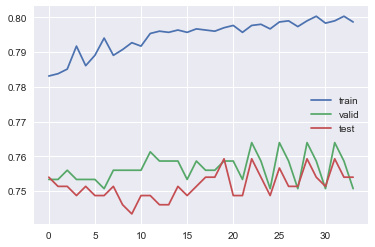

CRDataset
Train precision 0.7987417218543047
Valid precision 0.7570291777188329
Test precision 0.753968253968254
[1.01103974 0.5303281  1.0580161  ... 1.         1.         1.        ]
CRDataset tfgr 0.1 300 CRDataset_tfgr_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



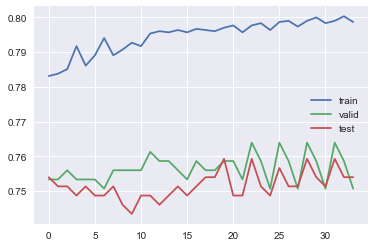


CRDataset
Train precision 0.7986754966887417
Valid precision 0.7570291777188329
Test precision 0.753968253968254
[1.01104024 0.53031176 1.05801813 ... 1.         1.         1.        ]
CRDataset tfgr 0.1 400 CRDataset_tfgr_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

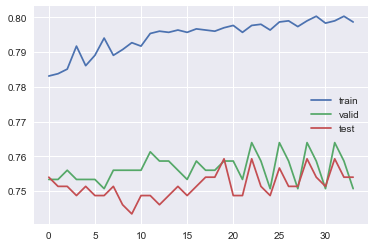

CRDataset
Train precision 0.7987086092715232
Valid precision 0.7570291777188329
Test precision 0.753968253968254
[1.0110401  0.53031672 1.05801623 ... 1.         1.         1.        ]
CRDataset tfgr 0.01 200 CRDataset_tfgr_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



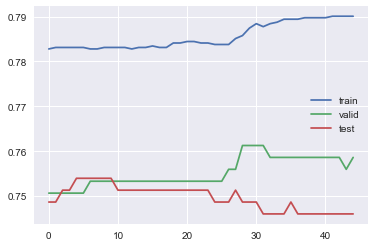


CRDataset
Train precision 0.7898013245033113
Valid precision 0.7583554376657824
Test precision 0.7462962962962962
[1.00155873 0.91804002 1.01060799 ... 1.         1.         1.        ]
CRDataset tfgr 0.01 300 CRDataset_tfgr_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

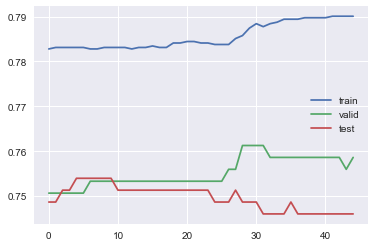

CRDataset
Train precision 0.7898013245033113
Valid precision 0.7583554376657824
Test precision 0.7462962962962962
[1.00155873 0.91804332 1.01060802 ... 1.         1.         1.        ]
CRDataset tfgr 0.01 400 CRDataset_tfgr_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



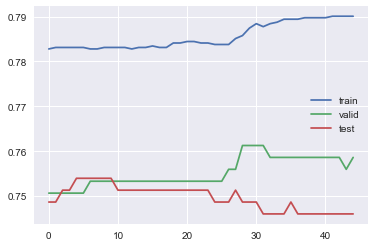


CRDataset
Train precision 0.7898013245033113
Valid precision 0.7583554376657824
Test precision 0.7462962962962962
[1.00155871 0.91803941 1.01060802 ... 1.         1.         1.        ]
CRDataset tfgr 0.001 200 CRDataset_tfgr_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

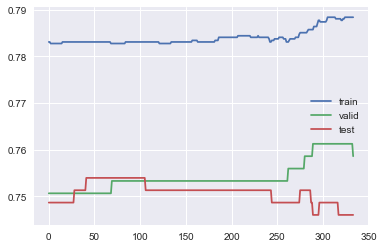

CRDataset
Train precision 0.7884105960264901
Valid precision 0.7610079575596818
Test precision 0.746031746031746
[1.00117562 0.93891285 1.00846366 ... 1.         1.         1.        ]
CRDataset tfgr 0.001 300 CRDataset_tfgr_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



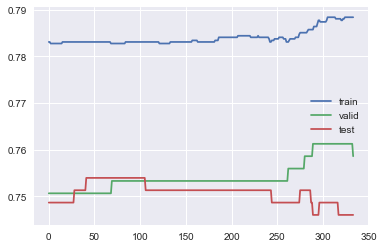


CRDataset
Train precision 0.7884105960264901
Valid precision 0.7610079575596818
Test precision 0.746031746031746
[1.00117565 0.93891225 1.00846365 ... 1.         1.         1.        ]
CRDataset tfgr 0.001 400 CRDataset_tfgr_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

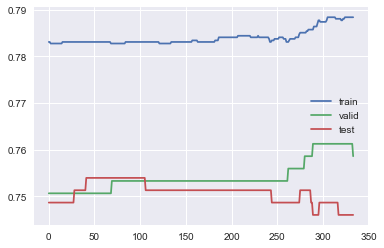

CRDataset
Train precision 0.7884105960264901
Valid precision 0.7610079575596818
Test precision 0.746031746031746
[1.00117562 0.93891372 1.0084637  ... 1.         1.         1.        ]
CRDataset tfor 0.1 200 CRDataset_tfor_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



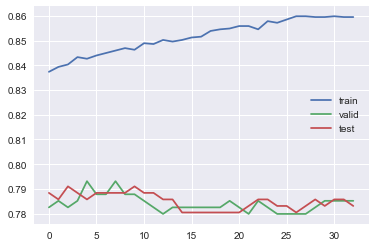


CRDataset
Train precision 0.8592052980132451
Valid precision 0.7824933687002653
Test precision 0.7838624338624338
[1.22134834 0.83282459 3.25193989 ... 1.00001074 1.00001074 1.00000153]
CRDataset tfor 0.1 300 CRDataset_tfor_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

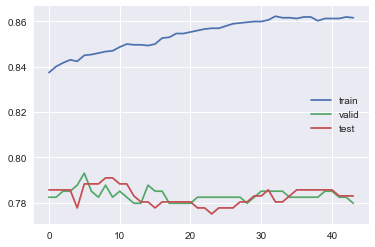

CRDataset
Train precision 0.8614238410596027
Valid precision 0.7827586206896552
Test precision 0.7846560846560846
[1.2830197  0.8609164  3.57714066 ... 1.00001442 1.00001442 1.00000171]
CRDataset tfor 0.1 400 CRDataset_tfor_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



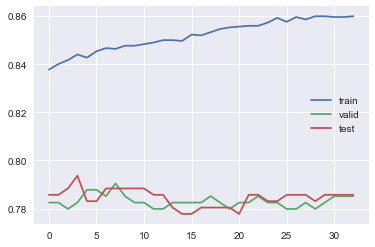


CRDataset
Train precision 0.8591390728476821
Valid precision 0.7824933687002653
Test precision 0.7849206349206349
[1.22247778 0.83429732 3.25129238 ... 1.00001079 1.00001079 1.00000154]
CRDataset tfor 0.01 200 CRDataset_tfor_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

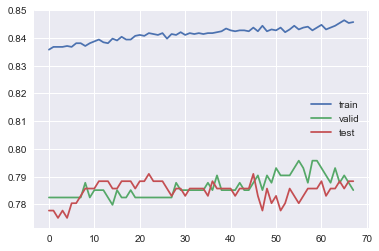

CRDataset
Train precision 0.844503311258278
Valid precision 0.7907161803713527
Test precision 0.7865079365079364
[1.05511513 0.88156867 1.71998593 ... 1.00000171 1.00000171 1.00000063]
CRDataset tfor 0.01 300 CRDataset_tfor_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



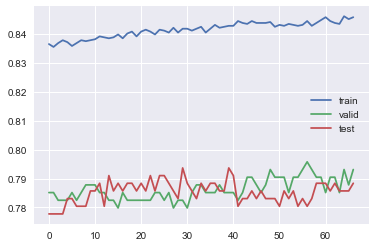


CRDataset
Train precision 0.844503311258278
Valid precision 0.789920424403183
Test precision 0.7867724867724867
[1.05445553 0.88289725 1.71071433 ... 1.00000156 1.00000156 1.00000062]
CRDataset tfor 0.01 400 CRDataset_tfor_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

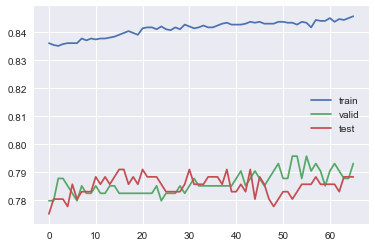

CRDataset
Train precision 0.844271523178808
Valid precision 0.790185676392573
Test precision 0.7865079365079364
[1.05368794 0.88415589 1.70064824 ... 1.00000153 1.00000153 1.00000062]
CRDataset tfor 0.001 200 CRDataset_tfor_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



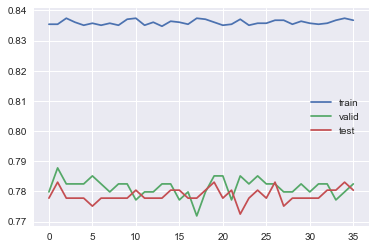


CRDataset
Train precision 0.8363245033112584
Valid precision 0.7809018567639258
Test precision 0.7793650793650795
[1.00296594 0.99192168 1.03684587 ... 1.         1.         1.00000005]
CRDataset tfor 0.001 300 CRDataset_tfor_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

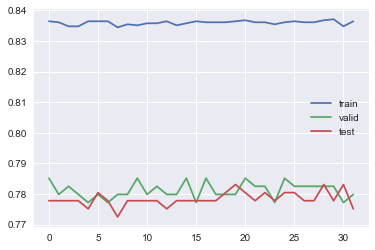

CRDataset
Train precision 0.8361258278145695
Valid precision 0.7814323607427055
Test precision 0.7793650793650795
[1.00262157 0.99279557 1.03276822 ... 0.99999999 0.99999999 1.00000004]
CRDataset tfor 0.001 400 CRDataset_tfor_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



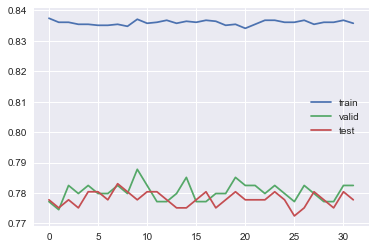


CRDataset
Train precision 0.8362582781456954
Valid precision 0.780106100795756
Test precision 0.7775132275132275
[1.00263853 0.99282293 1.03274641 ... 1.00000001 1.00000001 1.00000004]
CRDataset tfrf 0.1 200 CRDataset_tfrf_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

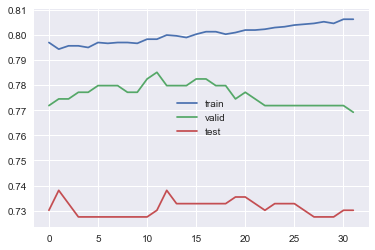

CRDataset
Train precision 0.8044039735099338
Valid precision 0.7716180371352784
Test precision 0.7301587301587302
[1.01741164 2.59815722 6.10108287 ... 0.99995935 0.99995935 1.0006831 ]
CRDataset tfrf 0.1 300 CRDataset_tfrf_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



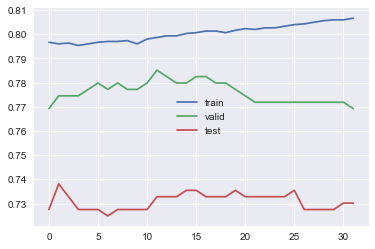


CRDataset
Train precision 0.8046026490066225
Valid precision 0.7716180371352784
Test precision 0.7304232804232804
[1.01722255 2.59818229 6.10038064 ... 0.99994857 0.99994857 1.0006811 ]
CRDataset tfrf 0.1 400 CRDataset_tfrf_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

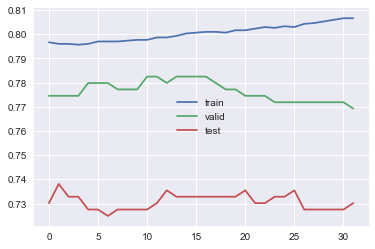

CRDataset
Train precision 0.8045364238410595
Valid precision 0.7718832891246683
Test precision 0.7298941798941798
[1.01742041 2.59820247 6.10154663 ... 0.9999566  0.9999566  1.0006871 ]
CRDataset tfrf 0.01 200 CRDataset_tfrf_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



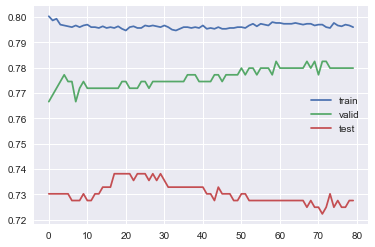


CRDataset
Train precision 0.7966225165562913
Valid precision 0.7801061007957559
Test precision 0.725925925925926
[1.00679487 1.59775281 3.25764358 ... 0.99992753 0.99992753 1.00025236]
CRDataset tfrf 0.01 300 CRDataset_tfrf_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

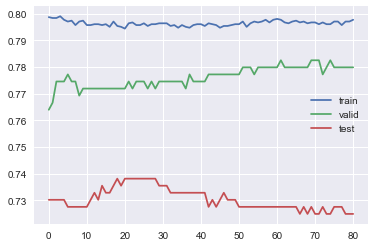

CRDataset
Train precision 0.7966225165562915
Valid precision 0.7801061007957559
Test precision 0.7259259259259259
[1.00687116 1.60351273 3.27474736 ... 0.99992626 0.99992626 1.00025508]
CRDataset tfrf 0.01 400 CRDataset_tfrf_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-15:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



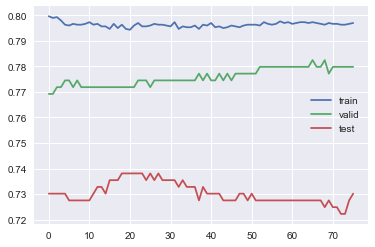


CRDataset
Train precision 0.7966887417218543
Valid precision 0.779840848806366
Test precision 0.7259259259259259
[1.00649675 1.57407193 3.18686116 ... 0.9999332  0.9999332  1.00024082]
CRDataset tfrf 0.001 200 CRDataset_tfrf_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

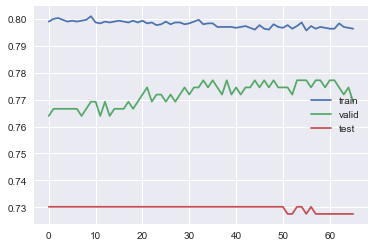

CRDataset
Train precision 0.7968543046357617
Valid precision 0.7748010610079576
Test precision 0.7277777777777779
[1.00079315 1.06236165 1.36558155 ... 0.9999917  0.9999917  1.00002557]
CRDataset tfrf 0.001 300 CRDataset_tfrf_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-16:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



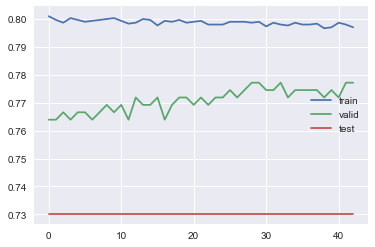


CRDataset
Train precision 0.7978145695364239
Valid precision 0.7742705570291777
Test precision 0.7301587301587302
[1.00052424 1.04084304 1.25207546 ... 0.99999486 0.99999486 1.00001681]
CRDataset tfrf 0.001 400 CRDataset_tfrf_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

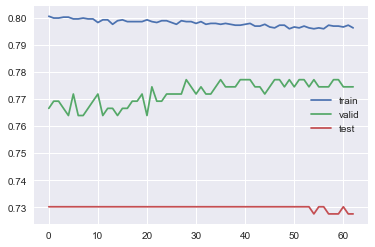

CRDataset
Train precision 0.796655629139073
Valid precision 0.7753315649867375
Test precision 0.7285714285714286
[1.00075557 1.05957747 1.35146451 ... 0.99999219 0.99999219 1.00002449]
MRDataset None 0.1 200 MRDataset_None_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-17:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



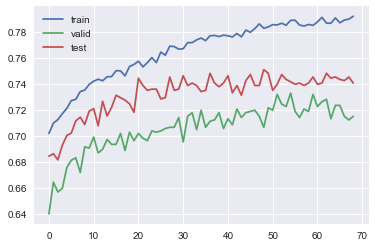


MRDataset
Train precision 0.7883339195685309
Valid precision 0.7209193245778611
Test precision 0.743298969072165
[-1.56690431e-02 -1.03614875e-06  1.08716630e+00 ...  1.00487734e+00
  1.00487734e+00  9.99513301e-01]
MRDataset None 0.1 300 MRDataset_None_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

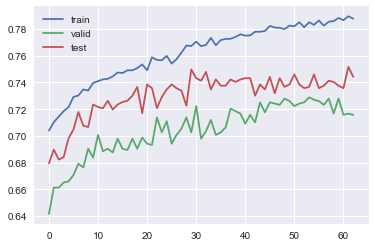

MRDataset
Train precision 0.7860476022980418
Valid precision 0.7226078799249531
Test precision 0.7406747891283973
[0.25988588 0.00413571 1.08220805 ... 1.00440439 1.00440439 0.99948265]
MRDataset None 0.1 400 MRDataset_None_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-18:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



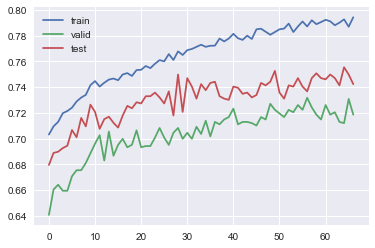


MRDataset
Train precision 0.7906202368390198
Valid precision 0.7196998123827392
Test precision 0.747610121836926
[-0.03964113  0.05825032  1.07508389 ...  1.00434356  1.00434356
  0.99953734]
MRDataset None 0.01 200 MRDataset_None_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

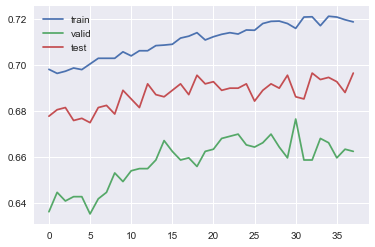

MRDataset
Train precision 0.719111267440497
Valid precision 0.6636022514071295
Test precision 0.6917525773195877
[0.70434477 0.98925155 0.99708801 ... 1.0002279  1.0002279  1.00009239]
MRDataset None 0.01 300 MRDataset_None_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-19:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



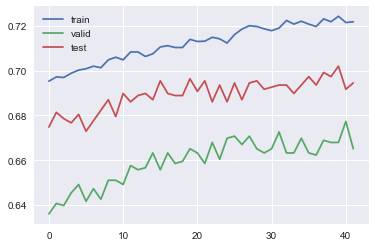


MRDataset
Train precision 0.7217727752374252
Valid precision 0.6668855534709193
Test precision 0.6952202436738519
[0.65874233 0.98631194 0.99621807 ... 1.00024155 1.00024155 1.00009992]
MRDataset None 0.01 400 MRDataset_None_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

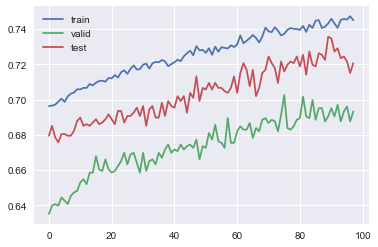

MRDataset
Train precision 0.744354555047485
Valid precision 0.6918386491557224
Test precision 0.7254920337394564
[-0.07401046  0.94924971  0.99659009 ...  1.00048169  1.00048169
  1.00019387]
MRDataset None 0.001 200 MRDataset_None_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-20:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



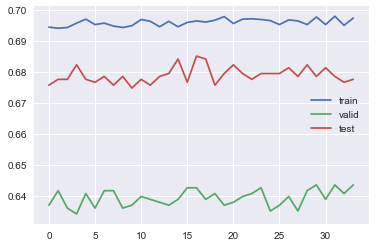


MRDataset
Train precision 0.6963770664790714
Valid precision 0.6398686679174485
Test precision 0.6793814432989691
[0.98042617 0.99973107 0.99970565 ... 1.0000087  1.0000087  1.00001024]
MRDataset None 0.001 300 MRDataset_None_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

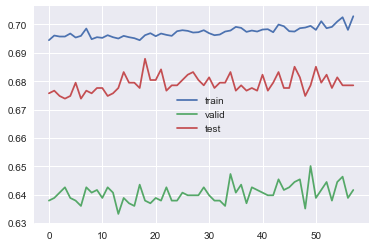

MRDataset
Train precision 0.7000000000000001
Valid precision 0.6419324577861163
Test precision 0.6794751640112466
[0.96637506 0.99943432 0.99940793 ... 1.00001794 1.00001794 1.0000174 ]
MRDataset None 0.001 400 MRDataset_None_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-21:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



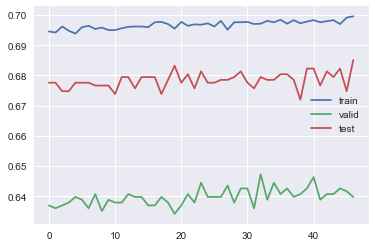


MRDataset
Train precision 0.6981474967757064
Valid precision 0.6413696060037524
Test precision 0.6794751640112465
[0.97286946 0.9995905  0.99956836 ... 1.00001323 1.00001323 1.00001416]
MRDataset tfidf 0.1 200 MRDataset_tfidf_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

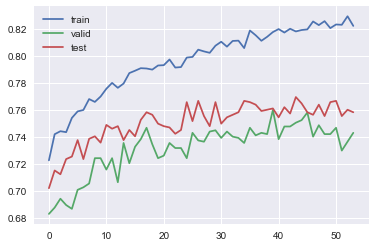

MRDataset
Train precision 0.8230507679681087
Valid precision 0.7439024390243902
Test precision 0.7604498594189316
[0.23858889 0.63866282 1.02662449 ... 1.00456889 1.00456889 1.00345935]
MRDataset tfidf 0.1 300 MRDataset_tfidf_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-22:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



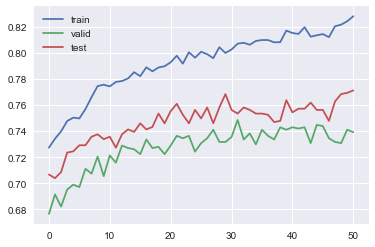


MRDataset
Train precision 0.818325712275765
Valid precision 0.7381801125703565
Test precision 0.7609184629803186
[0.34626001 0.34218218 1.02531222 ... 1.00425328 1.00425328 0.99999737]
MRDataset tfidf 0.1 400 MRDataset_tfidf_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

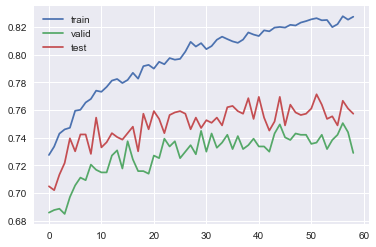

MRDataset
Train precision 0.8248446476726464
Valid precision 0.7391181988742964
Test precision 0.7596063730084348
[-0.09384156  0.2919503   0.97061392 ...  1.0058013   1.0058013
  1.00303003]
MRDataset tfidf 0.01 200 MRDataset_tfidf_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-23:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



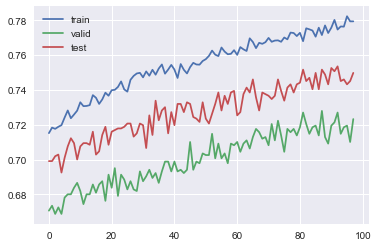


MRDataset
Train precision 0.7773830460780866
Valid precision 0.7176360225140713
Test precision 0.7477975632614807
[0.19524566 0.96482833 1.0077257  ... 1.00089129 1.00089129 1.00094929]
MRDataset tfidf 0.01 300 MRDataset_tfidf_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

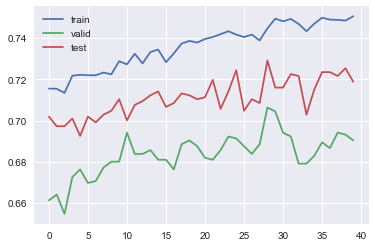

MRDataset
Train precision 0.748153359127682
Valid precision 0.6881801125703564
Test precision 0.7191190253045923
[0.77655697 0.99825745 0.99930677 ... 1.0003735  1.0003735  1.00040119]
MRDataset tfidf 0.01 400 MRDataset_tfidf_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-24:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



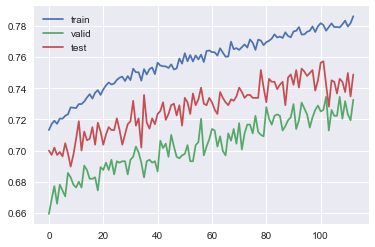


MRDataset
Train precision 0.7809942548950639
Valid precision 0.7245778611632271
Test precision 0.741518275538894
[0.22028962 0.96730995 1.0105978  ... 1.00056188 1.00056188 1.00098542]
MRDataset tfidf 0.001 200 MRDataset_tfidf_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

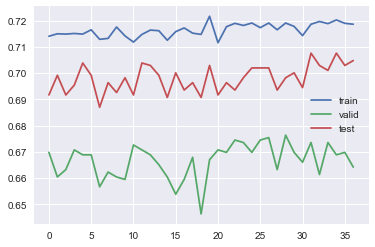

MRDataset
Train precision 0.7182553640520577
Valid precision 0.6686679174484051
Test precision 0.7013120899718837
[0.98023761 0.99976301 0.99996481 ... 1.00002145 1.00002145 1.00003581]
MRDataset tfidf 0.001 300 MRDataset_tfidf_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-25:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



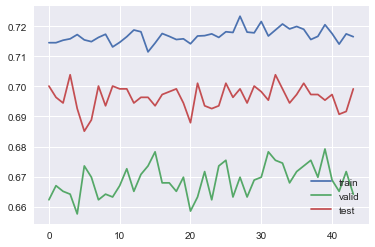


MRDataset
Train precision 0.7176105053347402
Valid precision 0.6707317073170731
Test precision 0.6961574507966259
[0.97763597 0.99965171 0.99994542 ... 1.00002823 1.00002823 1.00004267]
MRDataset tfidf 0.001 400 MRDataset_tfidf_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

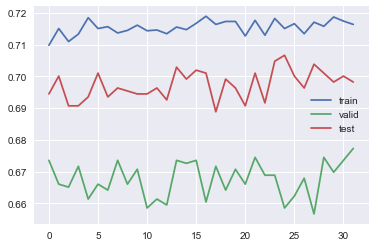

MRDataset
Train precision 0.7161800914526909
Valid precision 0.6678236397748593
Test precision 0.7000937207122775
[0.98346493 0.99979396 0.99997332 ... 1.00001828 1.00001828 1.00002984]
MRDataset tfchi2 0.1 200 MRDataset_tfchi2_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-26:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



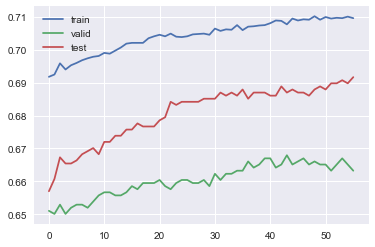


MRDataset
Train precision 0.7095908078321023
Valid precision 0.6651969981238274
Test precision 0.6889409559512651
[0.24364574 2.05487757 0.99999942 ... 1.         1.         1.00000014]
MRDataset tfchi2 0.1 300 MRDataset_tfchi2_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

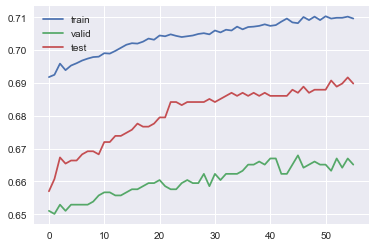

MRDataset
Train precision 0.7097666783913705
Valid precision 0.6651969981238275
Test precision 0.6890346766635426
[0.24922473 2.05704757 0.99999942 ... 1.         1.         1.00000014]
MRDataset tfchi2 0.1 400 MRDataset_tfchi2_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-27:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



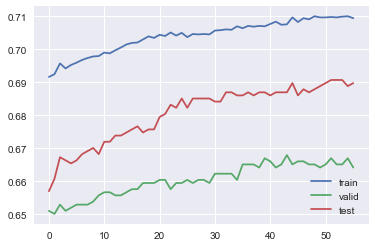


MRDataset
Train precision 0.7096963301676632
Valid precision 0.6653846153846154
Test precision 0.6892221180880974
[0.24885341 2.05606618 0.99999942 ... 1.         1.         1.00000014]
MRDataset tfchi2 0.01 200 MRDataset_tfchi2_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

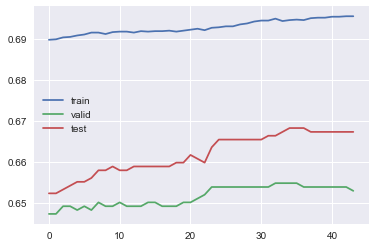

MRDataset
Train precision 0.695099073748388
Valid precision 0.6539399624765478
Test precision 0.667572633552015
[0.89069036 1.15254662 0.99999992 ... 1.         1.         1.00000002]
MRDataset tfchi2 0.01 300 MRDataset_tfchi2_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-28:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



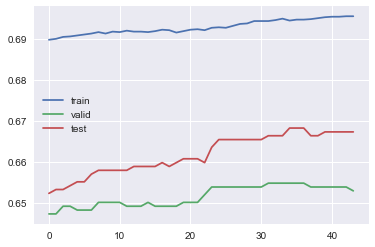


MRDataset
Train precision 0.6950756243404854
Valid precision 0.6540337711069418
Test precision 0.6673851921274603
[0.89069847 1.15254289 0.99999992 ... 1.         1.         1.00000002]
MRDataset tfchi2 0.01 400 MRDataset_tfchi2_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

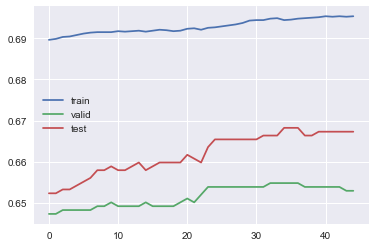

MRDataset
Train precision 0.6951225231562903
Valid precision 0.6538461538461539
Test precision 0.6672914714151827
[0.88846397 1.15638216 0.99999992 ... 1.00000001 1.00000001 1.00000002]
MRDataset tfchi2 0.001 200 MRDataset_tfchi2_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-29:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



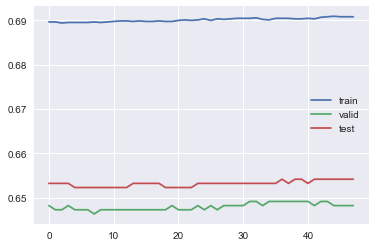


MRDataset
Train precision 0.6906436862469223
Valid precision 0.648686679174484
Test precision 0.6540768509840674
[0.98682739 1.01433599 0.99999999 ... 1.         1.         1.        ]
MRDataset tfchi2 0.001 300 MRDataset_tfchi2_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

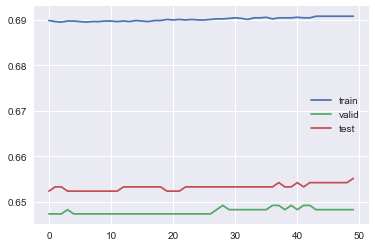

MRDataset
Train precision 0.6907257591745809
Valid precision 0.648405253283302
Test precision 0.6541705716963448
[0.98627658 1.01493436 0.99999999 ... 1.         1.         1.        ]
MRDataset tfchi2 0.001 400 MRDataset_tfchi2_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-30:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



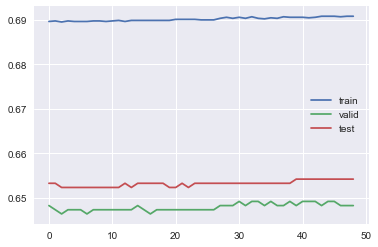


MRDataset
Train precision 0.6907023097666783
Valid precision 0.648686679174484
Test precision 0.6541705716963448
[0.98655342 1.01463586 0.99999999 ... 1.         1.         1.        ]
MRDataset tfig 0.1 200 MRDataset_tfig_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

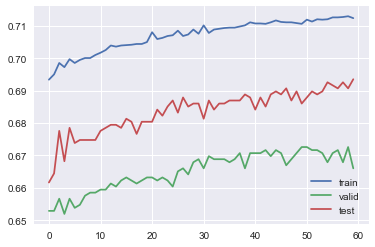

MRDataset
Train precision 0.7122640403329815
Valid precision 0.6703564727954971
Test precision 0.6908153701968135
[0.26587854 2.09303271 0.99999948 ... 1.         1.         1.00000018]
MRDataset tfig 0.1 300 MRDataset_tfig_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-31:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



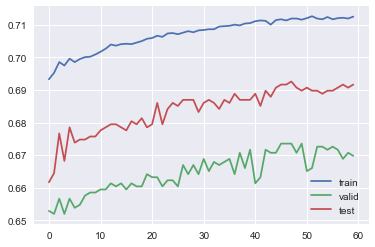


MRDataset
Train precision 0.7120998944776644
Valid precision 0.6701688555347092
Test precision 0.6903467666354264
[0.25391038 2.13839387 0.99999948 ... 0.99999999 0.99999999 1.00000018]
MRDataset tfig 0.1 400 MRDataset_tfig_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

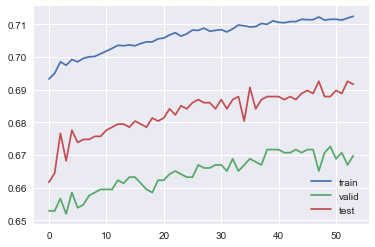

MRDataset
Train precision 0.7117012545433228
Valid precision 0.6698874296435271
Test precision 0.6898781630740393
[0.25899789 2.05353447 0.99999952 ... 1.         1.         1.00000017]
MRDataset tfig 0.01 200 MRDataset_tfig_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-32:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



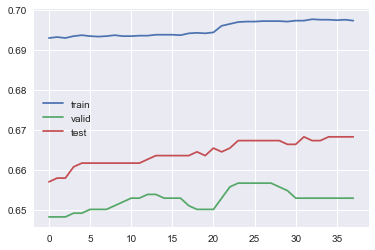


MRDataset
Train precision 0.6973502169070231
Valid precision 0.6533771106941838
Test precision 0.6675726335520149
[0.90149571 1.13031562 0.99999995 ... 1.         1.         1.00000002]
MRDataset tfig 0.01 300 MRDataset_tfig_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

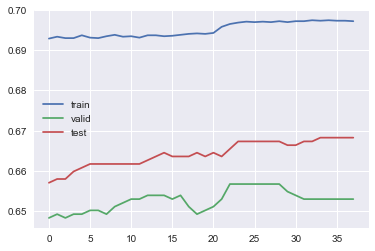

MRDataset
Train precision 0.6973267674991207
Valid precision 0.6535647279549718
Test precision 0.6675726335520149
[0.90149385 1.13032384 0.99999995 ... 1.         1.         1.00000002]
MRDataset tfig 0.01 400 MRDataset_tfig_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-33:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



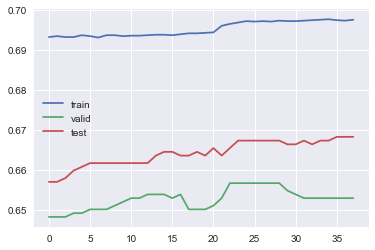


MRDataset
Train precision 0.6973502169070233
Valid precision 0.6535647279549718
Test precision 0.6672914714151827
[0.9015075  1.13031343 0.99999995 ... 1.         1.         1.00000002]
MRDataset tfig 0.001 200 MRDataset_tfig_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

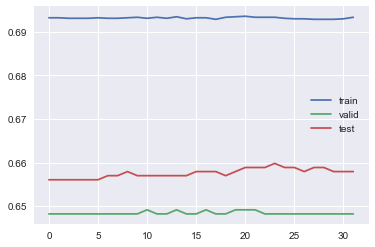

MRDataset
Train precision 0.6930120764450697
Valid precision 0.6482176360225139
Test precision 0.6585754451733832
[0.99096503 1.00969355 0.99999999 ... 1.         1.         1.        ]
MRDataset tfig 0.001 300 MRDataset_tfig_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-34:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



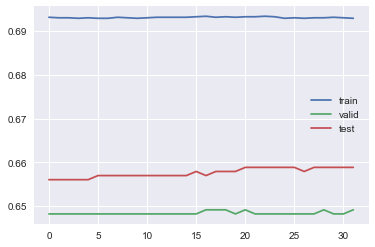


MRDataset
Train precision 0.6930824246687771
Valid precision 0.648405253283302
Test precision 0.6587628865979381
[0.99096664 1.00969172 0.99999999 ... 1.         1.         1.        ]
MRDataset tfig 0.001 400 MRDataset_tfig_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

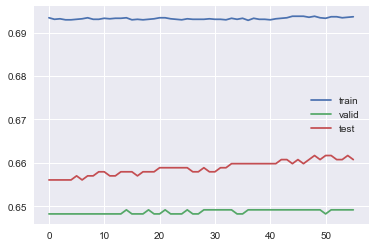

MRDataset
Train precision 0.6935514128268261
Valid precision 0.64906191369606
Test precision 0.6610121836925961
[0.9841406  1.01687622 0.99999999 ... 1.         1.         1.        ]
MRDataset tfgr 0.1 200 MRDataset_tfgr_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-35:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



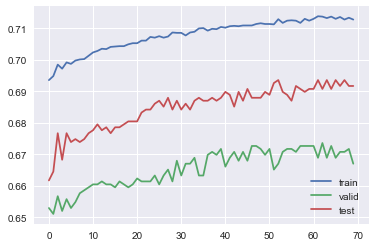


MRDataset
Train precision 0.713272364872787
Valid precision 0.670544090056285
Test precision 0.6921274601686973
[0.26969163 2.1926734  0.99999939 ... 0.99999999 0.99999999 1.00000019]
MRDataset tfgr 0.1 300 MRDataset_tfgr_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

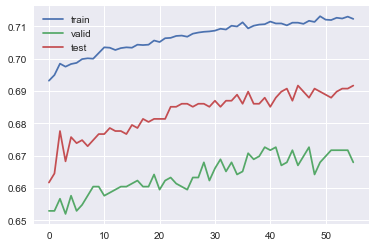

MRDataset
Train precision 0.7121116191816156
Valid precision 0.6698874296435272
Test precision 0.689784442361762
[0.26623397 2.08067871 0.99999948 ... 0.99999999 0.99999999 1.00000017]
MRDataset tfgr 0.1 400 MRDataset_tfgr_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-36:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



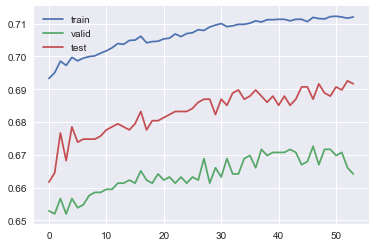


MRDataset
Train precision 0.7117129792472741
Valid precision 0.6688555347091933
Test precision 0.6901593252108715
[0.26063231 2.06572086 0.99999949 ... 1.         1.         1.00000017]
MRDataset tfgr 0.01 200 MRDataset_tfgr_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

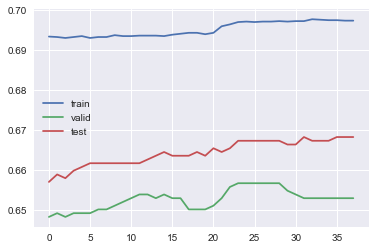

MRDataset
Train precision 0.6974088404267792
Valid precision 0.6535647279549718
Test precision 0.6674789128397375
[0.90147124 1.13031663 0.99999995 ... 1.         1.         1.00000002]
MRDataset tfgr 0.01 300 MRDataset_tfgr_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-37:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



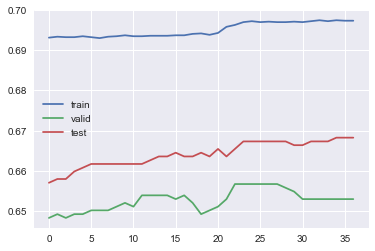


MRDataset
Train precision 0.6972564192754133
Valid precision 0.6537523452157598
Test precision 0.6673851921274601
[0.90370815 1.12639312 0.99999995 ... 1.         1.         1.00000002]
MRDataset tfgr 0.01 400 MRDataset_tfgr_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

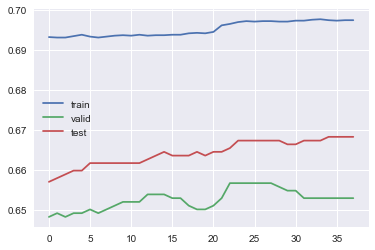

MRDataset
Train precision 0.6973150427951694
Valid precision 0.6535647279549718
Test precision 0.6674789128397375
[0.90149601 1.13031955 0.99999995 ... 1.         1.         1.00000002]
MRDataset tfgr 0.001 200 MRDataset_tfgr_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-38:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



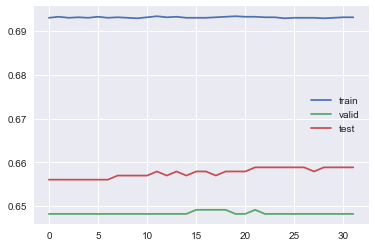


MRDataset
Train precision 0.6930706999648258
Valid precision 0.6482176360225139
Test precision 0.6587628865979381
[0.99096572 1.00969215 0.99999999 ... 1.         1.         1.        ]
MRDataset tfgr 0.001 300 MRDataset_tfgr_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

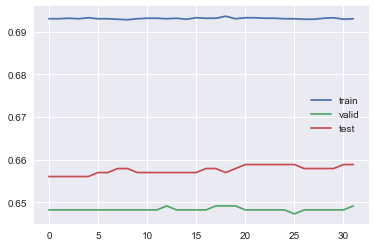

MRDataset
Train precision 0.693070699964826
Valid precision 0.648217636022514
Test precision 0.658481724461106
[0.99096726 1.00969481 0.99999999 ... 1.         1.         1.        ]
MRDataset tfgr 0.001 400 MRDataset_tfgr_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-39:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



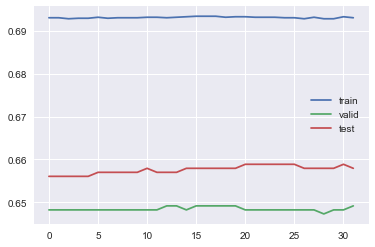


MRDataset
Train precision 0.6930355258529722
Valid precision 0.648217636022514
Test precision 0.6583880037488286
[0.99096585 1.00969069 0.99999999 ... 1.         1.         1.        ]
MRDataset tfor 0.1 200 MRDataset_tfor_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

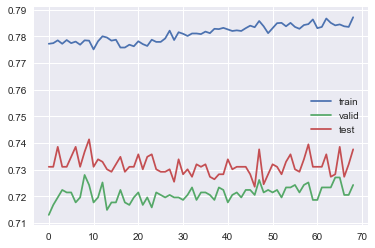

MRDataset
Train precision 0.7848047836792122
Valid precision 0.7226078799249531
Test precision 0.7319587628865979
[0.67990518 0.31510279 0.9998918  ... 1.00044387 1.00044387 1.00021775]
MRDataset tfor 0.1 300 MRDataset_tfor_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-40:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



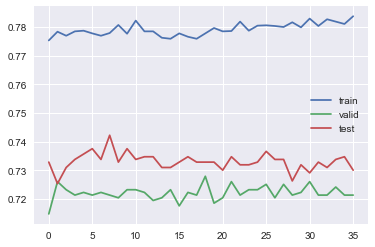


MRDataset
Train precision 0.7814984171649666
Valid precision 0.7225140712945592
Test precision 0.7317713214620432
[0.71730343 0.67768883 0.99994927 ... 1.00051108 1.00051108 1.00019956]
MRDataset tfor 0.1 400 MRDataset_tfor_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

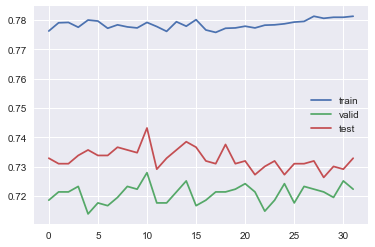

MRDataset
Train precision 0.7799624809473562
Valid precision 0.7209193245778611
Test precision 0.7301780693533271
[0.68661226 0.79973525 0.9999525  ... 1.00036902 1.00036902 1.00021266]
MRDataset tfor 0.01 200 MRDataset_tfor_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-41:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



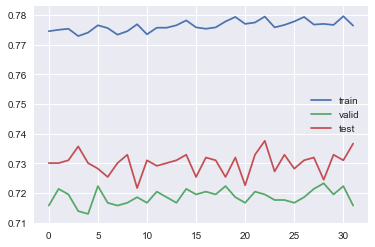


MRDataset
Train precision 0.7775471919334036
Valid precision 0.7192307692307692
Test precision 0.7313964386129335
[0.90431416 0.9982209  0.99999929 ... 1.00003465 1.00003465 1.00004162]
MRDataset tfor 0.01 300 MRDataset_tfor_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

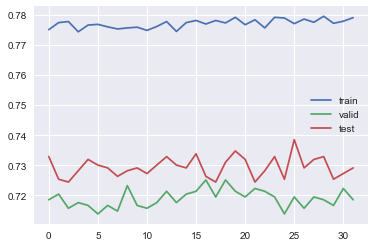

MRDataset
Train precision 0.7779927306835501
Valid precision 0.7185741088180112
Test precision 0.7300843486410498
[0.90625063 0.99749545 0.99999963 ... 1.00004692 1.00004692 1.00004204]
MRDataset tfor 0.01 400 MRDataset_tfor_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-42:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



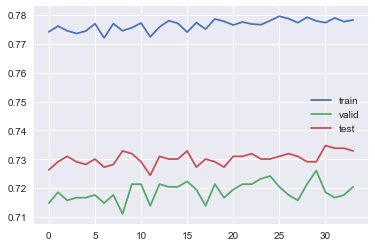


MRDataset
Train precision 0.7783210223941845
Valid precision 0.7198874296435271
Test precision 0.7317713214620432
[0.89924646 0.99743258 0.99999918 ... 1.00005408 1.00005408 1.00004036]
MRDataset tfor 0.001 200 MRDataset_tfor_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

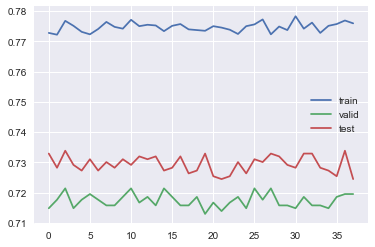

MRDataset
Train precision 0.7753663969984759
Valid precision 0.7168855534709193
Test precision 0.7294283036551078
[0.98808718 0.99962537 0.99999999 ... 1.0000064  1.0000064  1.00000752]
MRDataset tfor 0.001 300 MRDataset_tfor_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-43:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



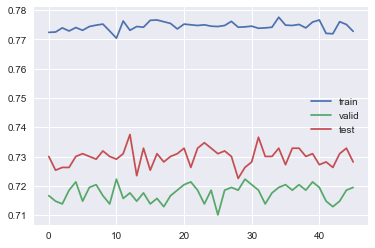


MRDataset
Train precision 0.774440145386329
Valid precision 0.7179174484052532
Test precision 0.7300843486410497
[0.9850216  0.99950621 0.99999998 ... 1.0000059  1.0000059  1.0000093 ]
MRDataset tfor 0.001 400 MRDataset_tfor_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

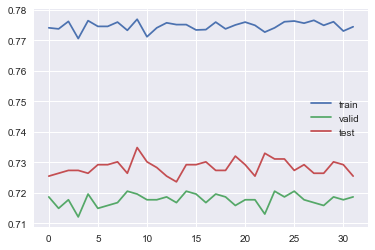

MRDataset
Train precision 0.774956032360183
Valid precision 0.7177298311444653
Test precision 0.7288659793814434
[0.98940314 0.99960806 0.99999998 ... 1.00000431 1.00000431 1.00000671]
MRDataset tfrf 0.1 200 MRDataset_tfrf_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-44:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



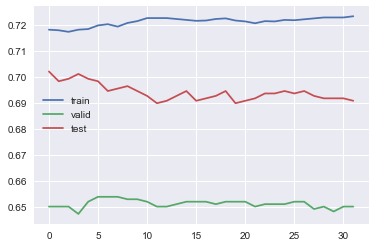


MRDataset
Train precision 0.7221596904678157
Valid precision 0.65046904315197
Test precision 0.6927835051546392
[2.3302521  3.65988529 1.25415445 ... 0.99964684 0.99964684 1.00010261]
MRDataset tfrf 0.1 300 MRDataset_tfrf_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

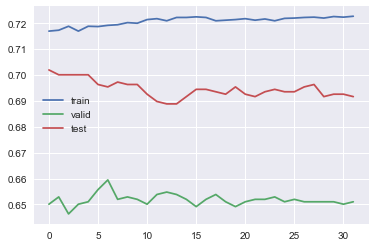

MRDataset
Train precision 0.7220776175401571
Valid precision 0.6513133208255159
Test precision 0.6935332708528584
[2.33212095 3.64379132 1.25349135 ... 0.99964518 0.99964518 1.00010414]
MRDataset tfrf 0.1 400 MRDataset_tfrf_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-45:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



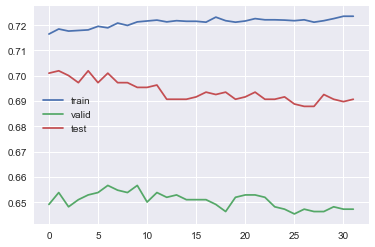


MRDataset
Train precision 0.722276937507328
Valid precision 0.647560975609756
Test precision 0.6901593252108716
[2.33011129 3.63105464 1.2549811  ... 0.9996557  0.9996557  1.00011872]
MRDataset tfrf 0.01 200 MRDataset_tfrf_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

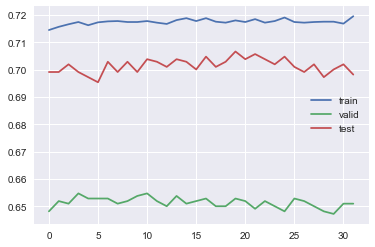

MRDataset
Train precision 0.7177629264861062
Valid precision 0.6502814258911821
Test precision 0.7010309278350515
[1.1968981  1.49553104 1.03428158 ... 0.99992084 0.99992084 1.00005319]
MRDataset tfrf 0.01 300 MRDataset_tfrf_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-46:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



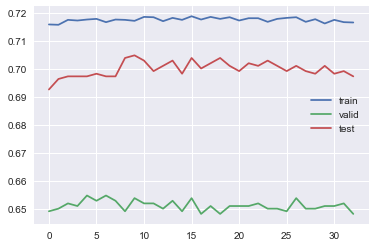


MRDataset
Train precision 0.7172118654003986
Valid precision 0.650562851782364
Test precision 0.6997188378631677
[1.20307101 1.51270702 1.03541692 ... 0.99991917 0.99991917 1.00005529]
MRDataset tfrf 0.01 400 MRDataset_tfrf_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

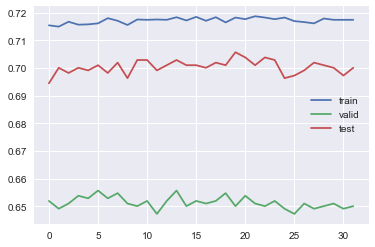

MRDataset
Train precision 0.7174111853675695
Valid precision 0.6499061913696059
Test precision 0.7
[1.19788773 1.49823633 1.03435608 ... 0.99992125 0.99992125 1.00005372]
MRDataset tfrf 0.001 200 MRDataset_tfrf_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-47:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



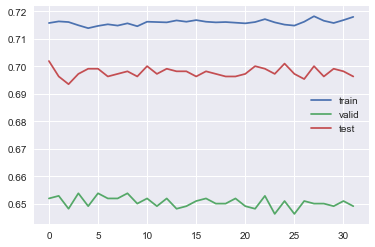


MRDataset
Train precision 0.7165083831633252
Valid precision 0.6497185741088181
Test precision 0.6980318650421744
[1.02117936 1.07075943 1.00367229 ... 0.99999319 0.99999319 1.00000686]
MRDataset tfrf 0.001 300 MRDataset_tfrf_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

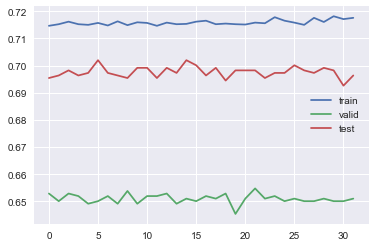

MRDataset
Train precision 0.7166959784265445
Valid precision 0.6506566604127579
Test precision 0.6971883786316776
[1.02121328 1.07063766 1.00369622 ... 0.99999344 0.99999344 1.00000673]
MRDataset tfrf 0.001 400 MRDataset_tfrf_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-48:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



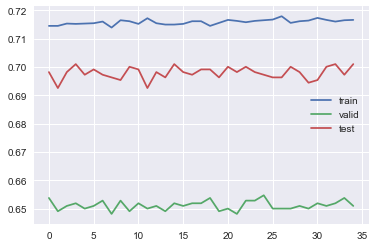


MRDataset
Train precision 0.7165787313870324
Valid precision 0.651125703564728
Test precision 0.6980318650421743
[1.02315896 1.07710027 1.00402622 ... 0.99999277 0.99999277 1.00000747]
SUBJDataset None 0.1 200 SUBJDataset_None_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

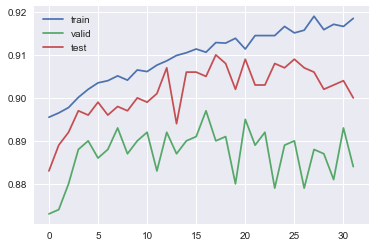

SUBJDataset
Train precision 0.9163625
Valid precision 0.8862
Test precision 0.9049000000000001
[ 0.40163361 -0.30177807  2.714714   ...  1.00000002  1.
  1.00000037]
SUBJDataset None 0.1 300 SUBJDataset_None_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-49:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



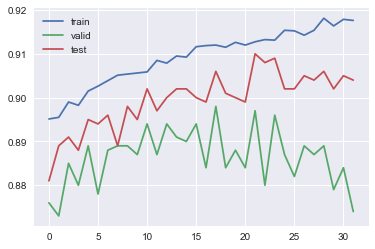


SUBJDataset
Train precision 0.9156625
Valid precision 0.8847000000000002
Test precision 0.9047000000000001
[ 0.45822176 -0.12907791  2.94418448 ...  1.00000002  1.
  1.00000029]
SUBJDataset None 0.1 400 SUBJDataset_None_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

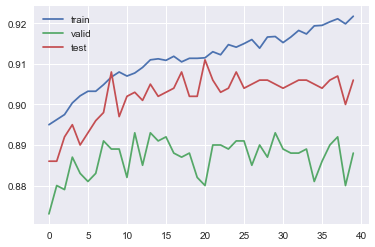

SUBJDataset
Train precision 0.9189499999999999
Valid precision 0.8871
Test precision 0.9049000000000001
[0.30562024 0.26057857 3.42354273 ... 1.00000002 1.         1.00000037]
SUBJDataset None 0.01 200 SUBJDataset_None_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-50:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



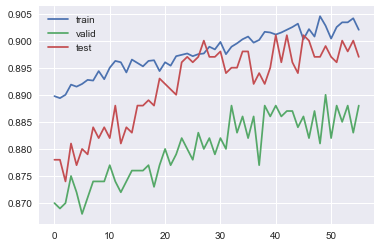


SUBJDataset
Train precision 0.9025874999999999
Valid precision 0.8854000000000001
Test precision 0.8981
[0.7292415  0.84755376 0.88171329 ... 1.         1.         0.99999996]
SUBJDataset None 0.01 300 SUBJDataset_None_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

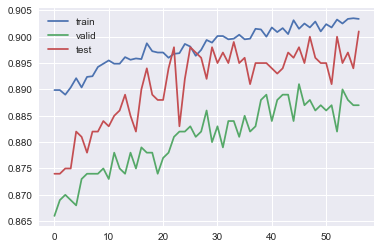

SUBJDataset
Train precision 0.902575
Valid precision 0.8868
Test precision 0.8964000000000001
[0.72740752 0.83634949 0.91298902 ... 1.         1.         0.99999998]
SUBJDataset None 0.01 400 SUBJDataset_None_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-51:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



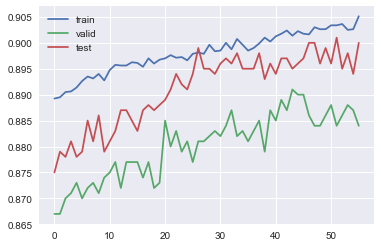


SUBJDataset
Train precision 0.90305
Valid precision 0.8857000000000002
Test precision 0.8979000000000001
[0.71172552 0.84268849 0.87832098 ... 1.         1.         0.99999996]
SUBJDataset None 0.001 200 SUBJDataset_None_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

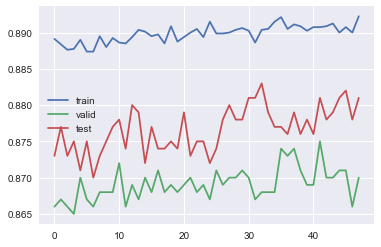

SUBJDataset
Train precision 0.890775
Valid precision 0.8702
Test precision 0.8790000000000001
[0.97942055 1.00010275 0.95670873 ... 1.         1.         0.99999999]
SUBJDataset None 0.001 300 SUBJDataset_None_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-52:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



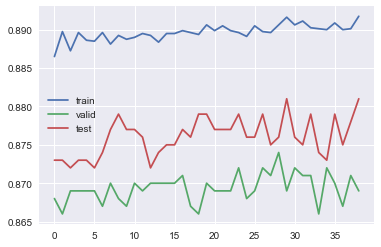


SUBJDataset
Train precision 0.8906499999999999
Valid precision 0.8698
Test precision 0.8771000000000001
[0.98332147 1.00109381 0.96180979 ... 1.         1.         0.99999999]
SUBJDataset None 0.001 400 SUBJDataset_None_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

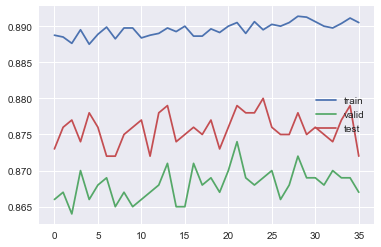

SUBJDataset
Train precision 0.89055
Valid precision 0.8687000000000001
Test precision 0.8756
[0.98457424 1.00083361 0.96576643 ... 1.         1.         0.99999999]
SUBJDataset tfidf 0.1 200 SUBJDataset_tfidf_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-53:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



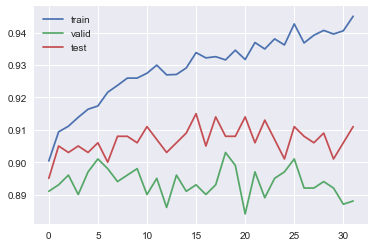


SUBJDataset
Train precision 0.9394375
Valid precision 0.8926999999999999
Test precision 0.9073
[0.68415198 0.1426036  2.89340011 ... 1.00000005 1.         0.99999997]
SUBJDataset tfidf 0.1 300 SUBJDataset_tfidf_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

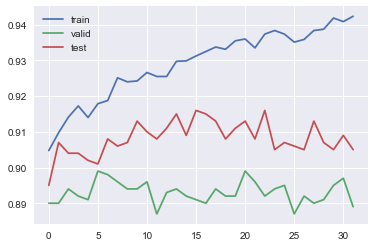

SUBJDataset
Train precision 0.9386375000000001
Valid precision 0.8921999999999999
Test precision 0.9077999999999999
[ 0.86340356 -0.13141489  3.22049121 ...  1.00000012  1.
  0.99999994]
SUBJDataset tfidf 0.1 400 SUBJDataset_tfidf_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-54:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



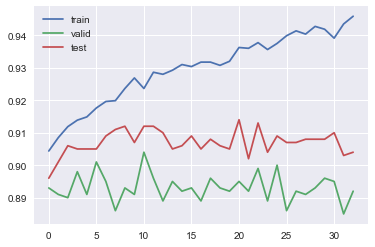


SUBJDataset
Train precision 0.9407875000000001
Valid precision 0.8919
Test precision 0.9068000000000002
[ 0.79527863 -0.23090934  3.44228311 ...  1.00000005  1.
  1.0000002 ]
SUBJDataset tfidf 0.01 200 SUBJDataset_tfidf_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

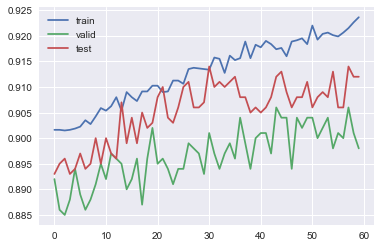

SUBJDataset
Train precision 0.9210624999999999
Valid precision 0.9014
Test precision 0.9094000000000001
[0.37613794 0.33952005 0.61916881 ... 1.         1.         1.        ]
SUBJDataset tfidf 0.01 300 SUBJDataset_tfidf_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-55:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



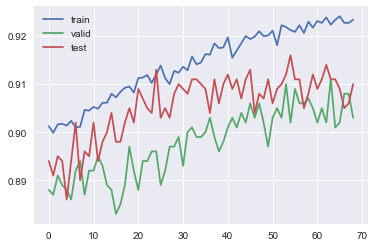


SUBJDataset
Train precision 0.923025
Valid precision 0.9047000000000001
Test precision 0.9098
[0.37828946 0.31536918 0.60003069 ... 1.         1.         1.00000002]
SUBJDataset tfidf 0.01 400 SUBJDataset_tfidf_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

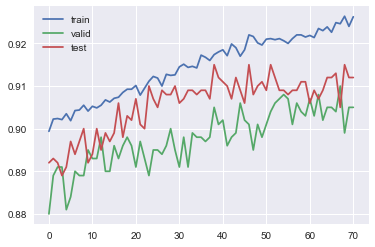

SUBJDataset
Train precision 0.9240499999999999
Valid precision 0.9046
Test precision 0.9106000000000002
[0.3780817  0.32565118 0.59047385 ... 1.         1.         1.00000002]
SUBJDataset tfidf 0.001 200 SUBJDataset_tfidf_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-56:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



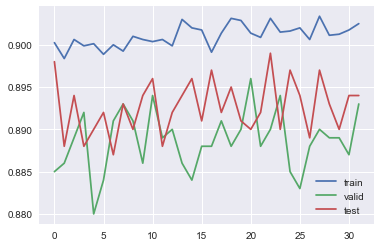


SUBJDataset
Train precision 0.9018875
Valid precision 0.8888000000000001
Test precision 0.8936999999999999
[0.98141522 0.98633671 0.92256546 ... 1.         1.         1.        ]
SUBJDataset tfidf 0.001 300 SUBJDataset_tfidf_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

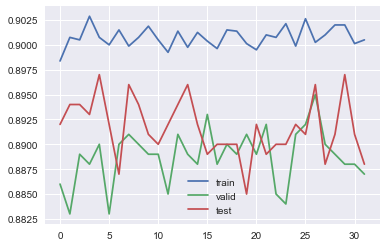

SUBJDataset
Train precision 0.9011249999999998
Valid precision 0.8889000000000001
Test precision 0.8914
[0.9801383  0.98439112 0.93461495 ... 1.         1.         1.        ]
SUBJDataset tfidf 0.001 400 SUBJDataset_tfidf_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-57:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



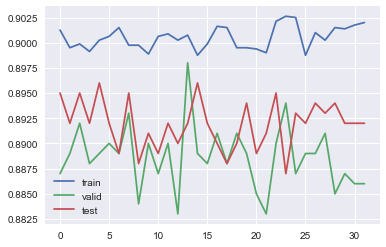


SUBJDataset
Train precision 0.9013874999999999
Valid precision 0.8884000000000001
Test precision 0.8924
[0.98172225 0.9857566  0.92601432 ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.1 200 SUBJDataset_tfchi2_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

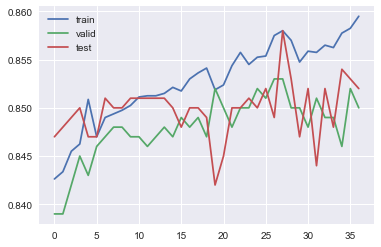

SUBJDataset
Train precision 0.8569625000000001
Valid precision 0.8497999999999999
Test precision 0.8513
[0.53480027 0.33487428 1.01395522 ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.1 300 SUBJDataset_tfchi2_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-58:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



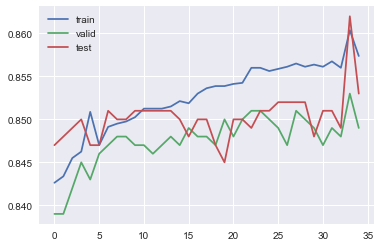


SUBJDataset
Train precision 0.8567625
Valid precision 0.8492
Test precision 0.8522000000000001
[0.54368416 0.31195838 1.0130077  ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.1 400 SUBJDataset_tfchi2_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

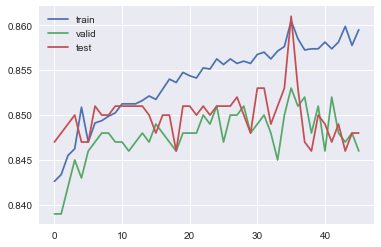

SUBJDataset
Train precision 0.858125
Valid precision 0.8488999999999999
Test precision 0.8483
[0.59746282 0.2164628  1.01660653 ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.01 200 SUBJDataset_tfchi2_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-59:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



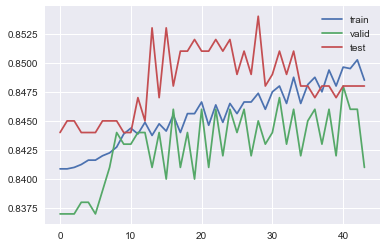


SUBJDataset
Train precision 0.8486125000000001
Valid precision 0.8444999999999998
Test precision 0.8478
[0.78937465 0.93072094 1.00206156 ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.01 300 SUBJDataset_tfchi2_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

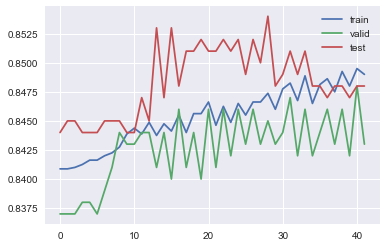

SUBJDataset
Train precision 0.8482125
Valid precision 0.8442000000000001
Test precision 0.8482
[0.79896432 0.93340266 1.0019647  ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.01 400 SUBJDataset_tfchi2_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-60:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



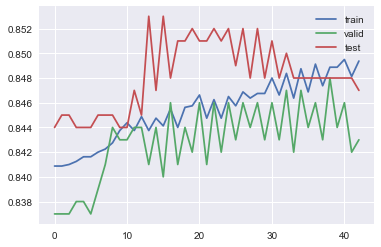


SUBJDataset
Train precision 0.848325
Valid precision 0.8445
Test precision 0.8478999999999999
[0.79392714 0.93219192 1.00201358 ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.001 200 SUBJDataset_tfchi2_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

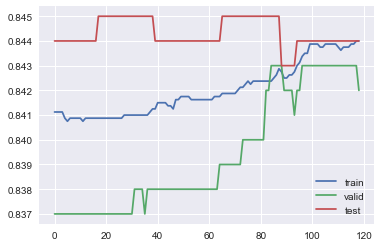

SUBJDataset
Train precision 0.843825
Valid precision 0.8429
Test precision 0.844
[0.94134068 0.98066491 1.00052176 ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.001 300 SUBJDataset_tfchi2_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-61:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



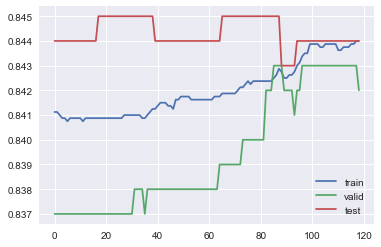


SUBJDataset
Train precision 0.8438125000000001
Valid precision 0.8429
Test precision 0.844
[0.94133855 0.98067026 1.00052174 ... 1.         1.         1.        ]
SUBJDataset tfchi2 0.001 400 SUBJDataset_tfchi2_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

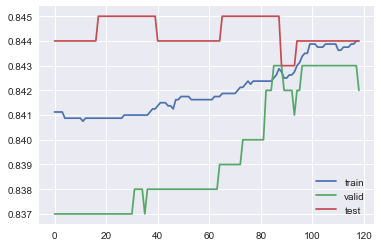

SUBJDataset
Train precision 0.8438125000000001
Valid precision 0.8429
Test precision 0.844
[0.94134299 0.98066998 1.00052176 ... 1.         1.         1.        ]
SUBJDataset tfig 0.1 200 SUBJDataset_tfig_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-62:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



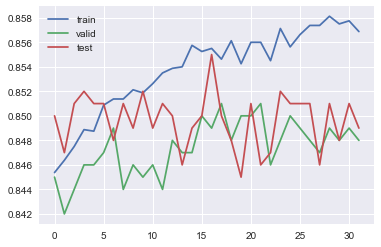


SUBJDataset
Train precision 0.8568875
Valid precision 0.8482000000000001
Test precision 0.8497
[0.5325337  0.50910933 1.01156094 ... 1.         1.         1.        ]
SUBJDataset tfig 0.1 300 SUBJDataset_tfig_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

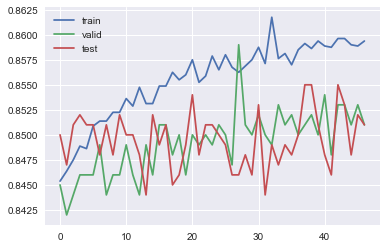

SUBJDataset
Train precision 0.8591249999999999
Valid precision 0.8516
Test precision 0.8513999999999999
[0.61388165 0.32202142 1.01580013 ... 1.         1.         1.        ]
SUBJDataset tfig 0.1 400 SUBJDataset_tfig_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-63:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



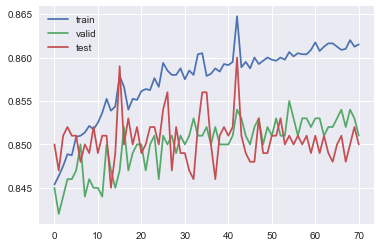


SUBJDataset
Train precision 0.8613125
Valid precision 0.8524999999999998
Test precision 0.8498000000000001
[0.75974691 0.0812436  1.0207982  ... 1.         1.         1.        ]
SUBJDataset tfig 0.01 200 SUBJDataset_tfig_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

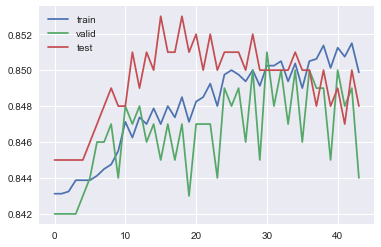

SUBJDataset
Train precision 0.8505375000000001
Valid precision 0.8479999999999999
Test precision 0.8491
[0.79930858 0.93074977 1.00184527 ... 1.         1.         1.        ]
SUBJDataset tfig 0.01 300 SUBJDataset_tfig_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-64:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



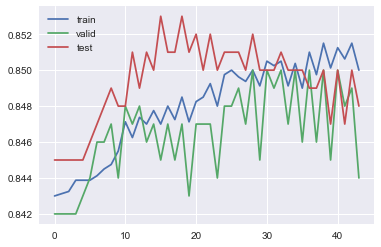


SUBJDataset
Train precision 0.8505125
Valid precision 0.8478
Test precision 0.849
[0.79920983 0.93082648 1.001846   ... 1.         1.         1.        ]
SUBJDataset tfig 0.01 400 SUBJDataset_tfig_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

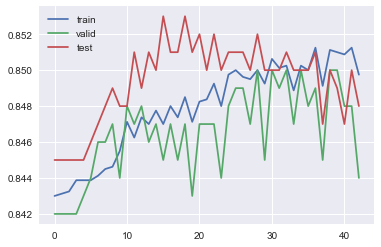

SUBJDataset
Train precision 0.85035
Valid precision 0.8478999999999999
Test precision 0.8492
[0.80385471 0.9320366  1.00180165 ... 1.         1.         1.        ]
SUBJDataset tfig 0.001 200 SUBJDataset_tfig_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-65:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



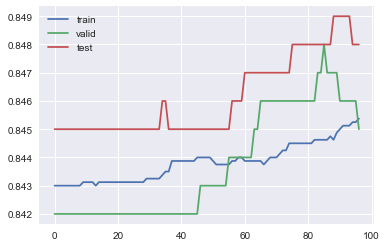


SUBJDataset
Train precision 0.84505
Valid precision 0.8462
Test precision 0.8486
[0.95335271 0.98495038 1.00038333 ... 1.         1.         1.        ]
SUBJDataset tfig 0.001 300 SUBJDataset_tfig_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

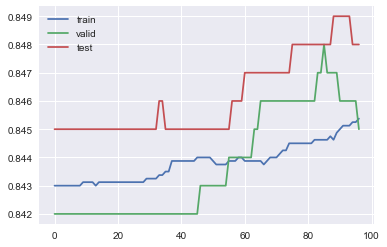

SUBJDataset
Train precision 0.84505
Valid precision 0.8462
Test precision 0.8486
[0.95335433 0.98494962 1.00038335 ... 1.         1.         1.        ]
SUBJDataset tfig 0.001 400 SUBJDataset_tfig_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-66:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



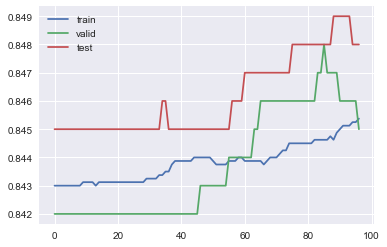


SUBJDataset
Train precision 0.84505
Valid precision 0.8462
Test precision 0.8486
[0.95335179 0.98494897 1.00038332 ... 1.         1.         1.        ]
SUBJDataset tfgr 0.1 200 SUBJDataset_tfgr_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

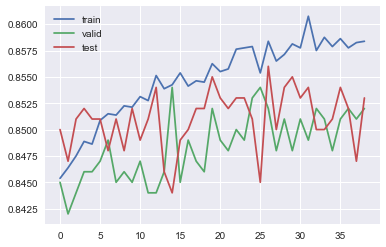

SUBJDataset
Train precision 0.858375
Valid precision 0.8504999999999999
Test precision 0.8519
[0.55879833 0.15757362 1.01272062 ... 1.         1.         1.        ]
SUBJDataset tfgr 0.1 300 SUBJDataset_tfgr_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-67:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



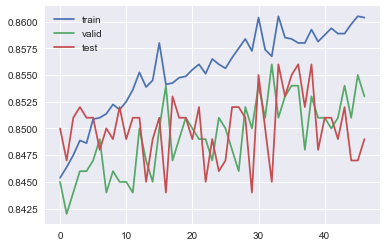


SUBJDataset
Train precision 0.8591875
Valid precision 0.8516999999999999
Test precision 0.8502000000000001
[0.62817905 0.21261161 1.0152922  ... 1.         1.         1.        ]
SUBJDataset tfgr 0.1 400 SUBJDataset_tfgr_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

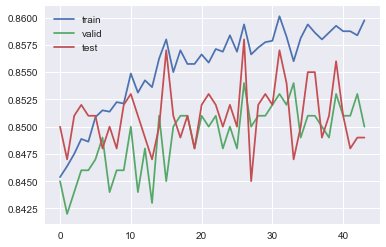

SUBJDataset
Train precision 0.8587624999999999
Valid precision 0.8507999999999999
Test precision 0.8513
[0.58881583 0.16862403 1.0139431  ... 1.         1.         1.        ]
SUBJDataset tfgr 0.01 200 SUBJDataset_tfgr_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-68:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



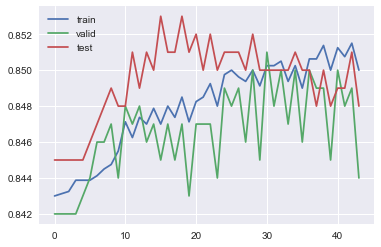


SUBJDataset
Train precision 0.8505375
Valid precision 0.8479999999999999
Test precision 0.8493999999999999
[0.79924781 0.93076909 1.00184542 ... 1.         1.         1.        ]
SUBJDataset tfgr 0.01 300 SUBJDataset_tfgr_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

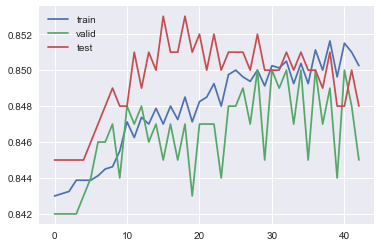

SUBJDataset
Train precision 0.8504000000000002
Valid precision 0.8474999999999999
Test precision 0.8494999999999999
[0.80352001 0.93234579 1.0018033  ... 1.         1.         1.        ]
SUBJDataset tfgr 0.01 400 SUBJDataset_tfgr_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-69:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



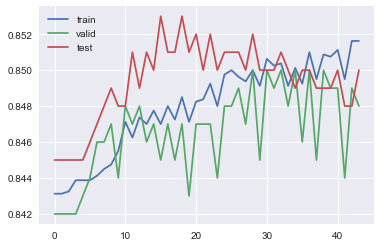


SUBJDataset
Train precision 0.8505375000000001
Valid precision 0.8480000000000001
Test precision 0.8492
[0.79851063 0.93147479 1.00184951 ... 1.         1.         1.        ]
SUBJDataset tfgr 0.001 200 SUBJDataset_tfgr_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

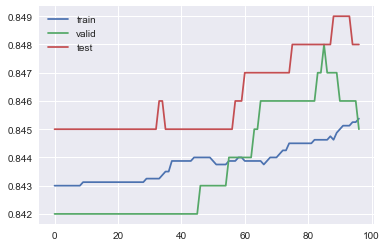

SUBJDataset
Train precision 0.84505
Valid precision 0.8462
Test precision 0.8486
[0.95335517 0.98494893 1.00038334 ... 1.         1.         1.        ]
SUBJDataset tfgr 0.001 300 SUBJDataset_tfgr_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-70:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



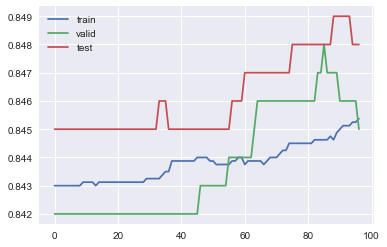


SUBJDataset
Train precision 0.84505
Valid precision 0.8462
Test precision 0.8486
[0.9533521  0.98494757 1.00038335 ... 1.         1.         1.        ]
SUBJDataset tfgr 0.001 400 SUBJDataset_tfgr_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

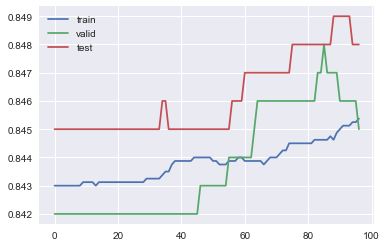

SUBJDataset
Train precision 0.84505
Valid precision 0.8462
Test precision 0.8486
[0.95335524 0.98494903 1.00038334 ... 1.         1.         1.        ]
SUBJDataset tfor 0.1 200 SUBJDataset_tfor_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-71:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



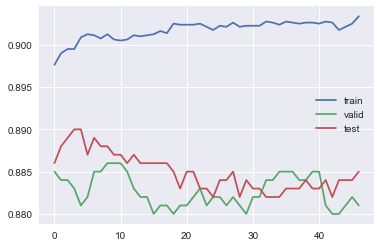


SUBJDataset
Train precision 0.9025375
Valid precision 0.8823000000000001
Test precision 0.8836
[1.62449083 0.80034038 2.82078983 ... 1.00000007 1.         1.00000132]
SUBJDataset tfor 0.1 300 SUBJDataset_tfor_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

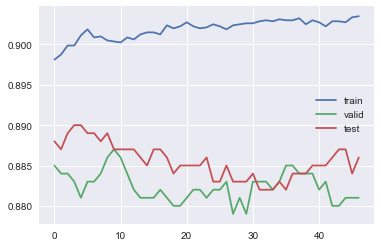

SUBJDataset
Train precision 0.9029124999999999
Valid precision 0.882
Test precision 0.8853
[1.62182285 0.79448647 2.81447053 ... 1.00000007 1.         1.00000133]
SUBJDataset tfor 0.1 400 SUBJDataset_tfor_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-72:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



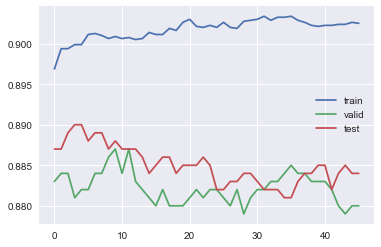


SUBJDataset
Train precision 0.902425
Valid precision 0.8817999999999999
Test precision 0.884
[1.61445251 0.79705437 2.76644179 ... 1.00000007 1.         1.0000013 ]
SUBJDataset tfor 0.01 200 SUBJDataset_tfor_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

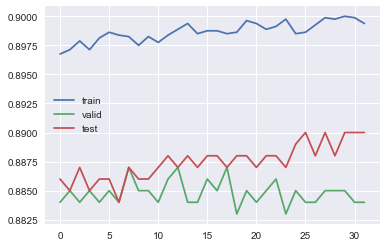

SUBJDataset
Train precision 0.8994125000000001
Valid precision 0.8845000000000001
Test precision 0.8889999999999999
[1.07116656 0.98011425 1.13057091 ... 1.         1.         1.        ]
SUBJDataset tfor 0.01 300 SUBJDataset_tfor_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-73:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



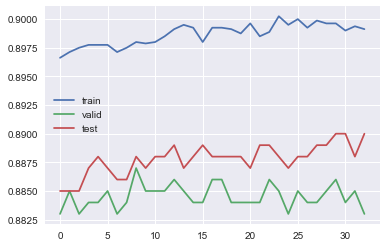


SUBJDataset
Train precision 0.8995624999999998
Valid precision 0.8844000000000001
Test precision 0.8887
[1.07332954 0.97949931 1.13436717 ... 1.         1.         1.        ]
SUBJDataset tfor 0.01 400 SUBJDataset_tfor_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

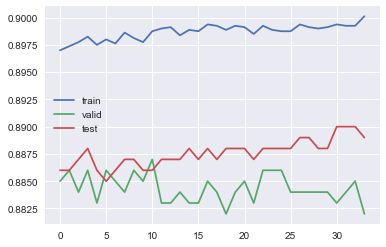

SUBJDataset
Train precision 0.8992125
Valid precision 0.884
Test precision 0.8888999999999999
[1.07550929 0.97809529 1.13854788 ... 1.         1.         1.        ]
SUBJDataset tfor 0.001 200 SUBJDataset_tfor_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-74:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



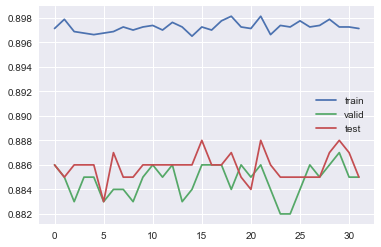


SUBJDataset
Train precision 0.8973125
Valid precision 0.8846
Test precision 0.8858
[1.00643738 0.99932817 1.01274994 ... 1.         1.         1.        ]
SUBJDataset tfor 0.001 300 SUBJDataset_tfor_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

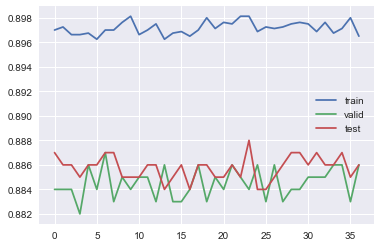

SUBJDataset
Train precision 0.8972749999999999
Valid precision 0.8846999999999999
Test precision 0.8863
[1.0073763  0.99920395 1.0147245  ... 1.         1.         1.        ]
SUBJDataset tfor 0.001 400 SUBJDataset_tfor_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-75:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



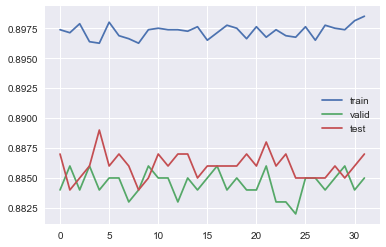


SUBJDataset
Train precision 0.8974375
Valid precision 0.8842000000000001
Test precision 0.8856999999999999
[1.00644679 0.99932377 1.01268742 ... 1.         1.         1.        ]
SUBJDataset tfrf 0.1 200 SUBJDataset_tfrf_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

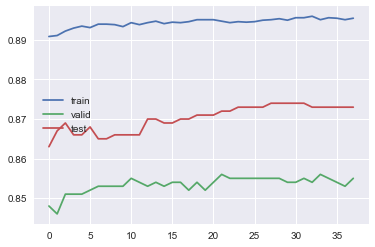

SUBJDataset
Train precision 0.89545
Valid precision 0.8545
Test precision 0.8734
[ 1.75544283  2.56690613 13.02440846 ...  1.00000034  1.00000016
  1.00000814]
SUBJDataset tfrf 0.1 300 SUBJDataset_tfrf_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-76:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



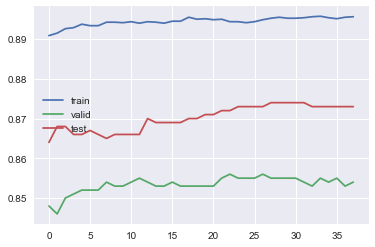


SUBJDataset
Train precision 0.8954375000000001
Valid precision 0.8543
Test precision 0.8734
[ 1.7573614   2.5703036  13.02337882 ...  1.00000034  1.00000016
  1.00000822]
SUBJDataset tfrf 0.1 400 SUBJDataset_tfrf_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

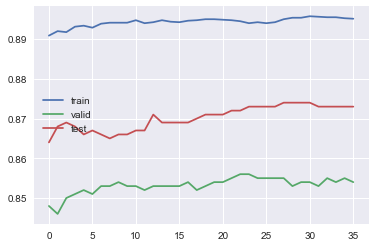

SUBJDataset
Train precision 0.895275
Valid precision 0.8542
Test precision 0.8734
[ 1.72697302  2.48136811 12.64163954 ...  1.00000034  1.00000017
  1.00000766]
SUBJDataset tfrf 0.01 200 SUBJDataset_tfrf_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-77:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



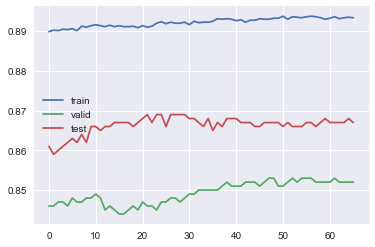


SUBJDataset
Train precision 0.8934000000000001
Valid precision 0.8522000000000001
Test precision 0.8671
[1.18461792 1.02386105 4.73913883 ... 1.00000024 1.00000012 1.00000105]
SUBJDataset tfrf 0.01 300 SUBJDataset_tfrf_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

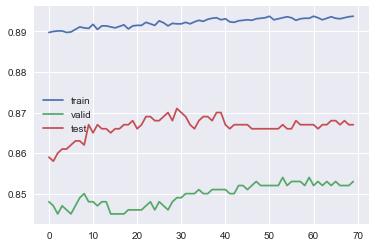

SUBJDataset
Train precision 0.8934000000000001
Valid precision 0.8524
Test precision 0.8672000000000001
[1.19510716 1.03972197 4.89357625 ... 1.00000025 1.00000012 1.00000109]
SUBJDataset tfrf 0.01 400 SUBJDataset_tfrf_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-78:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



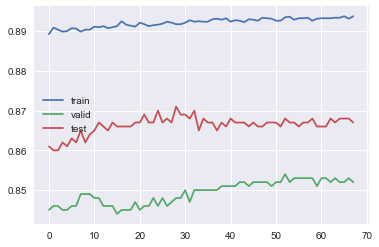


SUBJDataset
Train precision 0.8932875000000001
Valid precision 0.8523999999999999
Test precision 0.8672000000000001
[1.18978306 1.03112588 4.81560614 ... 1.00000025 1.00000012 1.00000109]
SUBJDataset tfrf 0.001 200 SUBJDataset_tfrf_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

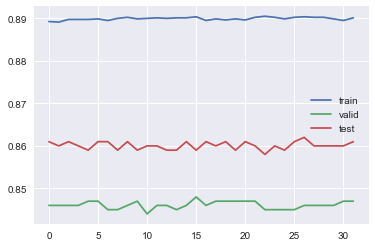

SUBJDataset
Train precision 0.8901249999999999
Valid precision 0.8457999999999999
Test precision 0.8601000000000001
[1.00054944 0.97660369 1.37156824 ... 1.00000004 1.00000002 1.00000006]
SUBJDataset tfrf 0.001 300 SUBJDataset_tfrf_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-79:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



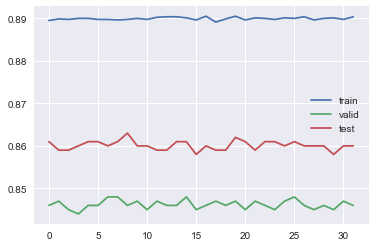


SUBJDataset
Train precision 0.8900125000000001
Valid precision 0.8460999999999999
Test precision 0.8601000000000001
[1.0005249  0.97656523 1.37148755 ... 1.00000004 1.00000002 1.00000006]
SUBJDataset tfrf 0.001 400 SUBJDataset_tfrf_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

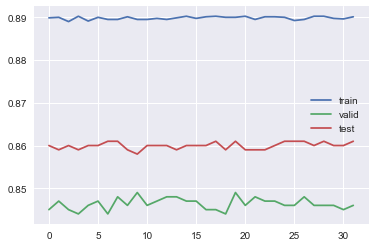

SUBJDataset
Train precision 0.8898999999999999
Valid precision 0.8462999999999999
Test precision 0.8604
[1.00050224 0.97667908 1.37199898 ... 1.00000004 1.00000002 1.00000007]
MPQADataset None 0.1 200 MPQADataset_None_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-80:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



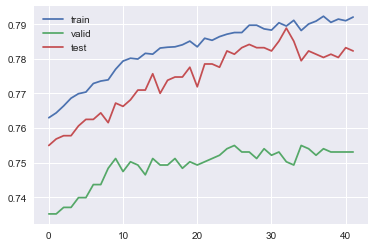


MPQADataset
Train precision 0.7907237152286657
Valid precision 0.7526861451460884
Test precision 0.7824693685202639
[0.9931412  0.99934397 0.999979   ... 1.00000133 1.00064681 0.9879337 ]
MPQADataset None 0.1 300 MPQADataset_None_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

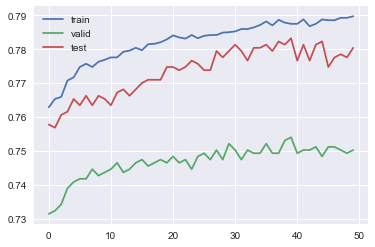

MPQADataset
Train precision 0.7884606317774634
Valid precision 0.7501413760603205
Test precision 0.7786993402450518
[0.99162094 0.99921781 1.00001115 ... 0.99999916 1.00048665 0.98480429]
MPQADataset None 0.1 400 MPQADataset_None_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-81:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



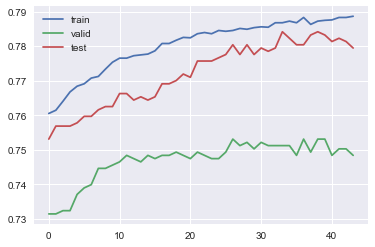


MPQADataset
Train precision 0.7876237623762377
Valid precision 0.7505183788878416
Test precision 0.7818096135721018
[0.99273989 0.9993397  0.99999811 ... 1.00000052 1.00064467 0.98662405]
MPQADataset None 0.01 200 MPQADataset_None_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

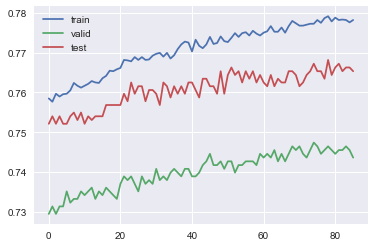

MPQADataset
Train precision 0.7782178217821782
Valid precision 0.745334590009425
Test precision 0.7657869934024505
[0.99919887 0.99987585 1.0000014  ... 1.00000015 1.00044832 0.99747393]
MPQADataset None 0.01 300 MPQADataset_None_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-82:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



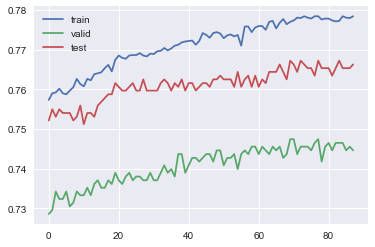


MPQADataset
Train precision 0.7777699198491278
Valid precision 0.7452403393025449
Test precision 0.7654099905749293
[0.99909459 0.99985412 0.9999985  ... 1.00000015 1.00045405 0.99742521]
MPQADataset None 0.01 400 MPQADataset_None_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

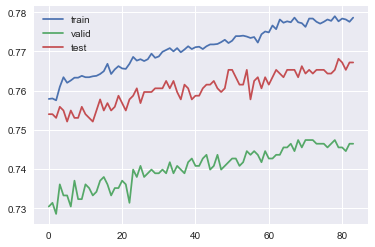

MPQADataset
Train precision 0.778017444601603
Valid precision 0.7460885956644676
Test precision 0.7659754948162111
[0.99926838 0.99986564 0.99999686 ... 0.99999983 1.00043728 0.99752761]
MPQADataset None 0.001 200 MPQADataset_None_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-83:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



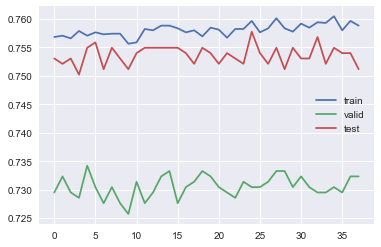


MPQADataset
Train precision 0.7589580386610089
Valid precision 0.7310084825636192
Test precision 0.7535344015080113
[0.99999312 0.99999857 1.         ... 0.99999999 1.00003344 0.99990839]
MPQADataset None 0.001 300 MPQADataset_None_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

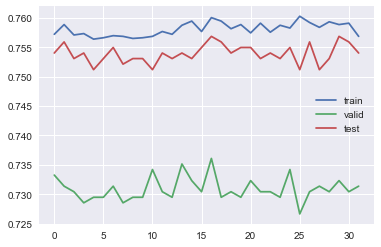

MPQADataset
Train precision 0.7586397925506836
Valid precision 0.7307257304429783
Test precision 0.7540056550424128
[0.9999955  0.99999811 0.99999994 ... 1.00000001 1.0000283  0.99992667]
MPQADataset None 0.001 400 MPQADataset_None_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-84:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



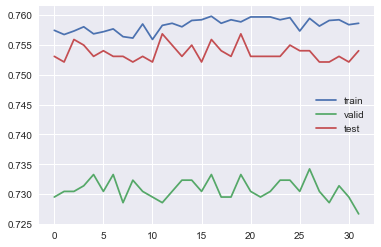


MPQADataset
Train precision 0.7588519566242338
Valid precision 0.730631479736098
Test precision 0.7532516493873704
[0.99999552 0.99999921 0.99999989 ... 0.99999999 1.00002894 0.9999278 ]
MPQADataset tfidf 0.1 200 MPQADataset_tfidf_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

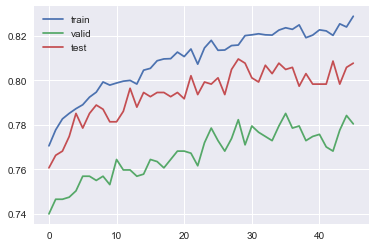

MPQADataset
Train precision 0.8231023102310232
Valid precision 0.7761545711592837
Test precision 0.8021677662582469
[0.95309225 0.99358919 1.00032689 ... 1.00000021 1.00333718 0.96891046]
MPQADataset tfidf 0.1 300 MPQADataset_tfidf_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-85:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



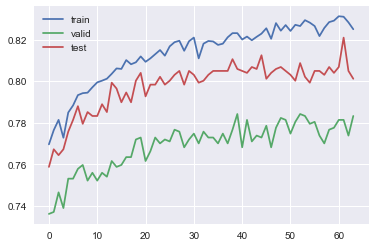


MPQADataset
Train precision 0.8274752475247527
Valid precision 0.7777568331762488
Test precision 0.8056550424128182
[0.97897805 0.99621398 0.99995346 ... 1.0000249  1.00428486 0.95924409]
MPQADataset tfidf 0.1 400 MPQADataset_tfidf_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

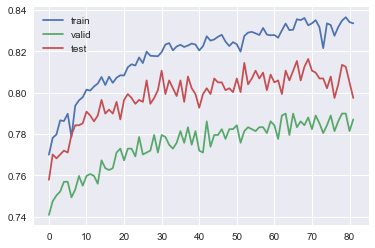

MPQADataset
Train precision 0.8316831683168318
Valid precision 0.7853911404335532
Test precision 0.8052780395852969
[0.92223845 0.99276296 0.99992924 ... 0.99997233 1.00451937 0.95314847]
MPQADataset tfidf 0.01 200 MPQADataset_tfidf_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-86:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



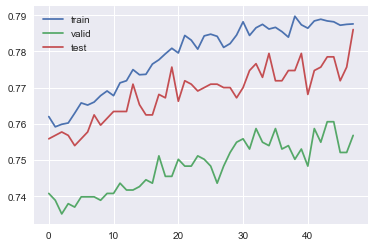


MPQADataset
Train precision 0.787977369165488
Valid precision 0.7547596606974553
Test precision 0.7763430725730442
[0.99742799 0.99952847 0.9999716  ... 0.99999957 1.00078364 0.99610042]
MPQADataset tfidf 0.01 300 MPQADataset_tfidf_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

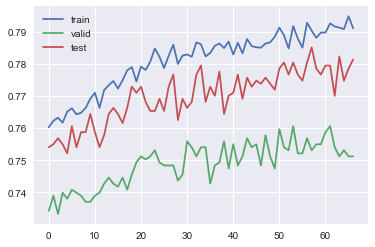

MPQADataset
Train precision 0.790983026874116
Valid precision 0.7542884071630538
Test precision 0.7786050895381715
[0.99564595 0.9993413  0.99999797 ... 0.99999872 1.00089074 0.99461121]
MPQADataset tfidf 0.01 400 MPQADataset_tfidf_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-87:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



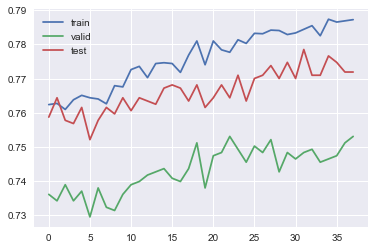


MPQADataset
Train precision 0.785077793493635
Valid precision 0.7478793590951932
Test precision 0.7730442978322337
[0.99848479 0.99957259 0.99998171 ... 1.0000023  1.00069382 0.99724763]
MPQADataset tfidf 0.001 200 MPQADataset_tfidf_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

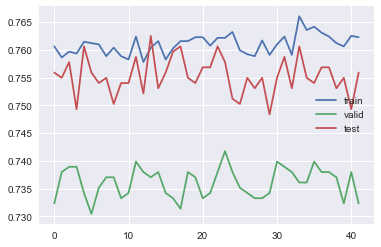

MPQADataset
Train precision 0.7624823196605376
Valid precision 0.736569274269557
Test precision 0.7549481621112158
[0.99989901 0.99996865 0.99999921 ... 0.99999998 1.00008277 0.99964182]
MPQADataset tfidf 0.001 300 MPQADataset_tfidf_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-88:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



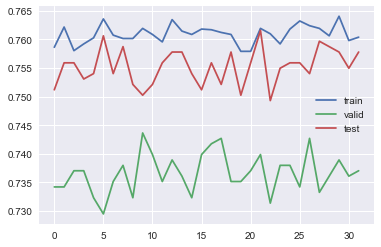


MPQADataset
Train precision 0.7614214992927864
Valid precision 0.7365692742695571
Test precision 0.7558906691800189
[0.99990066 0.99997057 0.99999802 ... 0.99999999 1.00007098 0.99974947]
MPQADataset tfidf 0.001 400 MPQADataset_tfidf_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

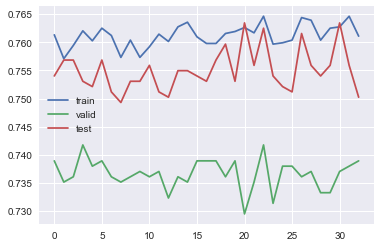

MPQADataset
Train precision 0.761951909476662
Valid precision 0.7360980207351554
Test precision 0.7554194156456174
[0.99993011 0.99999837 1.00000122 ... 0.99999973 1.00006978 0.99974585]
MPQADataset tfchi2 0.1 200 MPQADataset_tfchi2_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-89:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



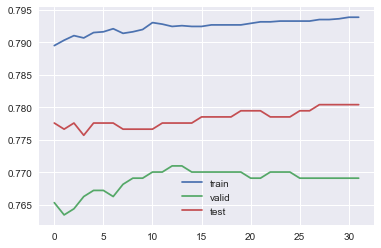


MPQADataset
Train precision 0.7934464875058935
Valid precision 0.769368520263902
Test precision 0.7796418473138548
[1.00053109 0.99998483 1.00011305 ... 0.99997423 1.00000001 0.99999999]
MPQADataset tfchi2 0.1 300 MPQADataset_tfchi2_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

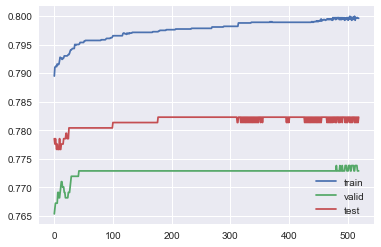

MPQADataset
Train precision 0.7996699669966997
Valid precision 0.7733270499528746
Test precision 0.7819038642789821
[1.00412803 0.99995471 0.99988397 ... 0.99999937 1.00000002 0.99999999]
MPQADataset tfchi2 0.1 400 MPQADataset_tfchi2_0.1_400


Exception in thread Thread-90:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

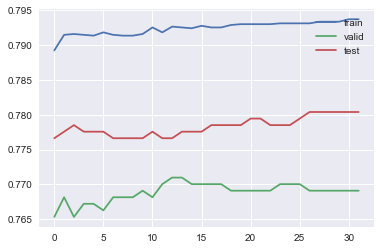


MPQADataset
Train precision 0.7933168316831682
Valid precision 0.769368520263902
Test precision 0.7797360980207351
[1.00056402 1.00000044 1.0001693  ... 1.00000196 1.00000001 0.99999999]
MPQADataset tfchi2 0.01 200 MPQADataset_tfchi2_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

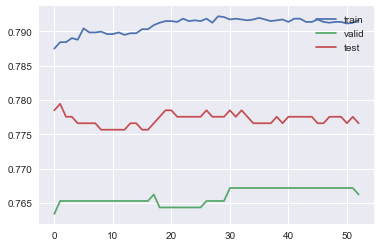

MPQADataset
Train precision 0.7913837812352664
Valid precision 0.7671065032987747
Test precision 0.7771913289349669
[1.00011851 0.9999864  1.00004249 ... 0.99999392 1.         1.        ]
MPQADataset tfchi2 0.01 300 MPQADataset_tfchi2_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-91:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



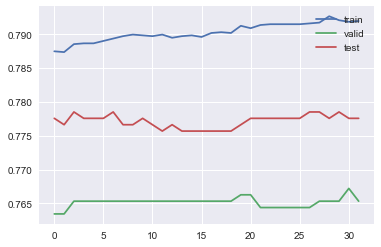


MPQADataset
Train precision 0.7917845355964168
Valid precision 0.765032987747408
Test precision 0.7778510838831292
[1.00005849 1.00000641 1.0000339  ... 0.99999946 1.         1.        ]
MPQADataset tfchi2 0.01 400 MPQADataset_tfchi2_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

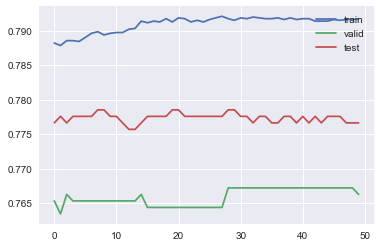

MPQADataset
Train precision 0.7915605846298915
Valid precision 0.7671065032987747
Test precision 0.7770970782280866
[1.00010406 1.00000817 0.99997914 ... 0.99999416 1.         1.        ]
MPQADataset tfchi2 0.001 200 MPQADataset_tfchi2_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-92:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



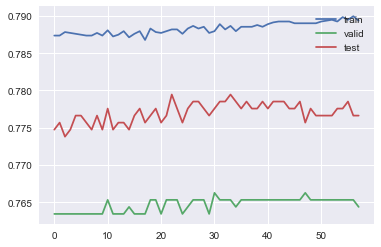


MPQADataset
Train precision 0.7894035832154643
Valid precision 0.7652214891611686
Test precision 0.7770970782280867
[1.00001121 1.00000113 0.99999774 ... 1.0000007  1.         1.        ]
MPQADataset tfchi2 0.001 300 MPQADataset_tfchi2_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

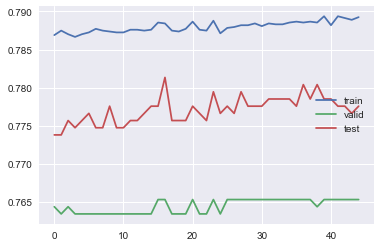

MPQADataset
Train precision 0.7888613861386139
Valid precision 0.7652214891611686
Test precision 0.7783223374175307
[1.00001052 1.00000148 0.99999892 ... 1.00000011 1.         1.        ]
MPQADataset tfchi2 0.001 400 MPQADataset_tfchi2_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-93:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



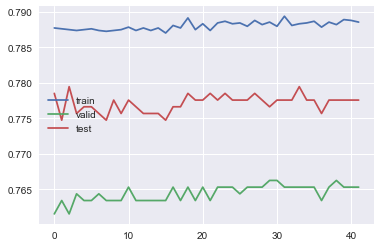


MPQADataset
Train precision 0.7884252710985383
Valid precision 0.7652214891611686
Test precision 0.7775683317624882
[1.00000937 0.99999895 1.00000167 ... 0.99999933 1.         1.        ]
MPQADataset tfig 0.1 200 MPQADataset_tfig_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

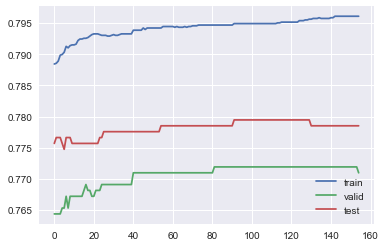

MPQADataset
Train precision 0.796086751532296
Valid precision 0.7718190386427898
Test precision 0.7785108388312912
[1.00148481 1.00005628 1.00044784 ... 0.99997161 1.00000001 0.99999998]
MPQADataset tfig 0.1 300 MPQADataset_tfig_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-94:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



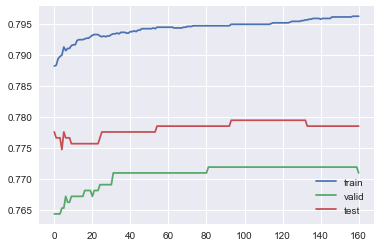


MPQADataset
Train precision 0.7961338991041962
Valid precision 0.7718190386427898
Test precision 0.7785108388312912
[1.0015302  0.99999979 0.99999114 ... 0.99997594 1.00000001 0.99999998]
MPQADataset tfig 0.1 400 MPQADataset_tfig_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

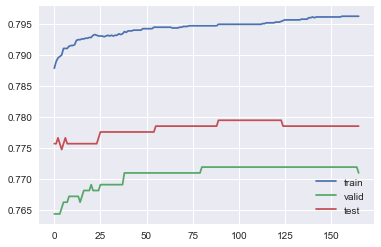

MPQADataset
Train precision 0.7962046204620463
Valid precision 0.7718190386427898
Test precision 0.7785108388312912
[1.00157233 1.00000226 1.0002241  ... 1.0000352  1.00000001 0.99999998]
MPQADataset tfig 0.01 200 MPQADataset_tfig_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-95:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



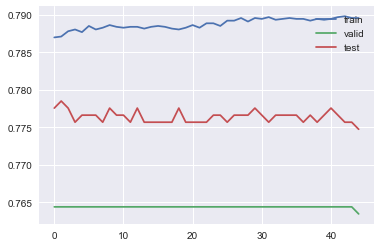


MPQADataset
Train precision 0.7895332390381895
Valid precision 0.7642789820923657
Test precision 0.7761545711592837
[1.00007619 0.99998973 1.00000421 ... 0.99999648 1.         1.        ]
MPQADataset tfig 0.01 300 MPQADataset_tfig_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

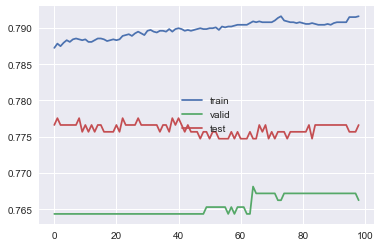

MPQADataset
Train precision 0.7910301744460161
Valid precision 0.7671065032987747
Test precision 0.7763430725730442
[1.00016425 0.99998876 1.00008031 ... 0.99999899 1.         1.        ]
MPQADataset tfig 0.01 400 MPQADataset_tfig_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-96:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



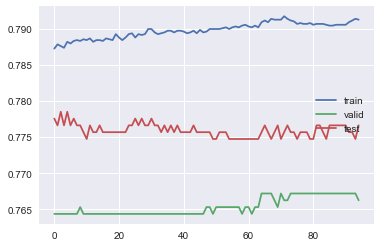


MPQADataset
Train precision 0.7907708628005657
Valid precision 0.7671065032987747
Test precision 0.776248821866164
[1.00015399 0.99997887 1.0000178  ... 1.00000745 1.         1.        ]
MPQADataset tfig 0.001 200 MPQADataset_tfig_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

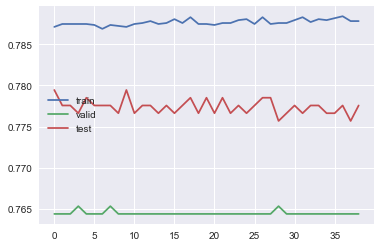

MPQADataset
Train precision 0.787989156058463
Valid precision 0.7643732327992458
Test precision 0.7770028275212064
[1.00000798 0.99999843 1.00000139 ... 0.99999917 1.         1.        ]
MPQADataset tfig 0.001 300 MPQADataset_tfig_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-97:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



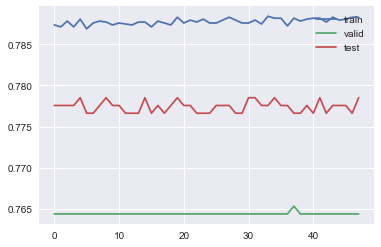


MPQADataset
Train precision 0.7880952380952382
Valid precision 0.7643732327992458
Test precision 0.7773798303487276
[1.00000877 0.99999833 1.00000163 ... 1.00000028 1.         1.        ]
MPQADataset tfig 0.001 400 MPQADataset_tfig_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

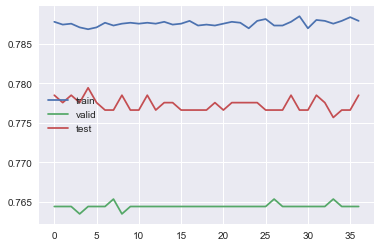

MPQADataset
Train precision 0.7878712871287129
Valid precision 0.7644674835061261
Test precision 0.777191328934967
[1.00000706 0.99999975 0.9999984  ... 1.0000003  1.         1.        ]
MPQADataset tfgr 0.1 200 MPQADataset_tfgr_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-98:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



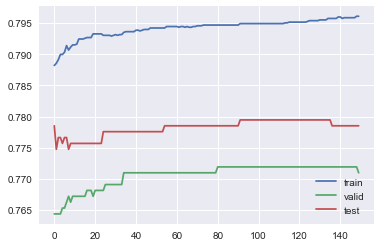


MPQADataset
Train precision 0.7958981612446958
Valid precision 0.7718190386427898
Test precision 0.7785108388312912
[1.00150244 0.99992925 0.9998848  ... 1.00001182 1.00000001 0.99999998]
MPQADataset tfgr 0.1 300 MPQADataset_tfgr_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

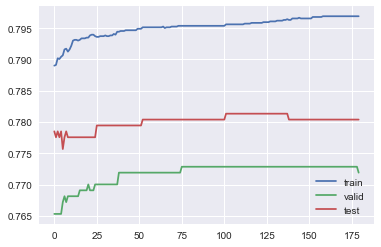

MPQADataset
Train precision 0.7969118340405468
Valid precision 0.7727615457115928
Test precision 0.7803958529688974
[1.00166948 0.99989509 1.00011731 ... 0.99997605 1.00000001 0.99999998]
MPQADataset tfgr 0.1 400 MPQADataset_tfgr_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-99:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



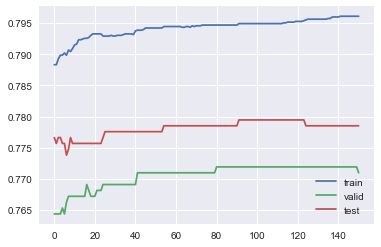


MPQADataset
Train precision 0.796086751532296
Valid precision 0.7718190386427898
Test precision 0.7785108388312912
[1.00146423 1.0000589  0.99965957 ... 0.99997745 1.00000001 0.99999998]
MPQADataset tfgr 0.01 200 MPQADataset_tfgr_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

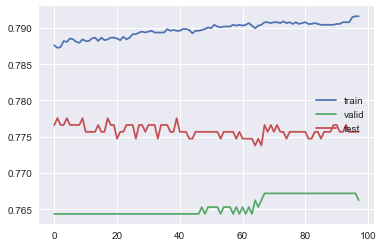

MPQADataset
Train precision 0.7909005186232909
Valid precision 0.7671065032987747
Test precision 0.775966069745523
[1.00015103 1.0000076  0.99990984 ... 0.99999746 1.         1.        ]
MPQADataset tfgr 0.01 300 MPQADataset_tfgr_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-100:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



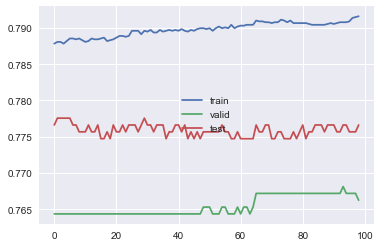


MPQADataset
Train precision 0.790959453088166
Valid precision 0.7672007540056549
Test precision 0.7761545711592837
[1.00015347 1.00000159 0.99993979 ... 1.00000328 1.         1.        ]
MPQADataset tfgr 0.01 400 MPQADataset_tfgr_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

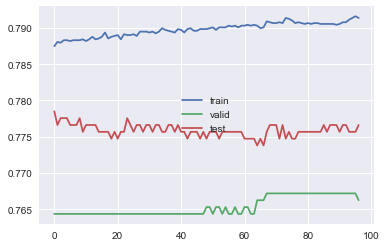

MPQADataset
Train precision 0.7909123055162659
Valid precision 0.7671065032987747
Test precision 0.776248821866164
[1.00016565 0.999983   1.00004236 ... 1.00000247 1.         1.        ]
MPQADataset tfgr 0.001 200 MPQADataset_tfgr_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-101:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



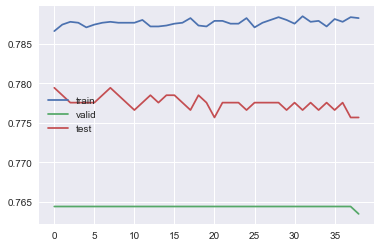


MPQADataset
Train precision 0.7880009429514381
Valid precision 0.7642789820923657
Test precision 0.7768143261074457
[1.00000731 1.00000085 1.00000347 ... 0.99999917 1.         1.        ]
MPQADataset tfgr 0.001 300 MPQADataset_tfgr_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

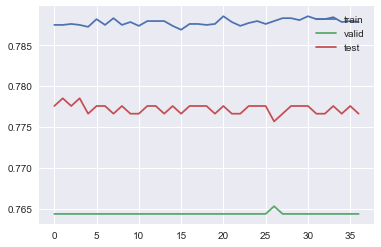

MPQADataset
Train precision 0.7881659594530882
Valid precision 0.7643732327992458
Test precision 0.7770970782280867
[1.00000539 1.00000111 1.00000079 ... 0.99999923 1.         1.        ]
MPQADataset tfgr 0.001 400 MPQADataset_tfgr_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-102:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



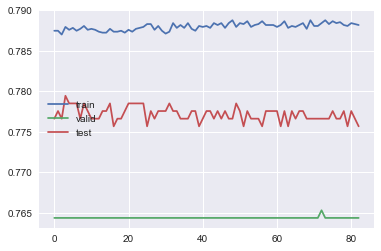


MPQADataset
Train precision 0.7883899104196134
Valid precision 0.7643732327992458
Test precision 0.7767200754005655
[1.00001378 0.9999988  1.00000598 ... 0.99999934 1.         1.        ]
MPQADataset tfor 0.1 200 MPQADataset_tfor_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

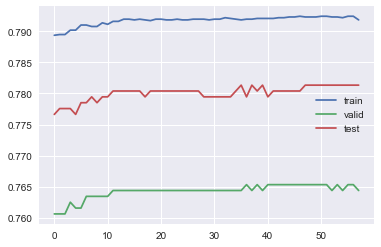

MPQADataset
Train precision 0.7923031588873173
Valid precision 0.765032987747408
Test precision 0.7813383600377002
[1.00195933 0.99990813 1.00020328 ... 0.99999644 1.00002177 1.00003469]
MPQADataset tfor 0.1 300 MPQADataset_tfor_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-103:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



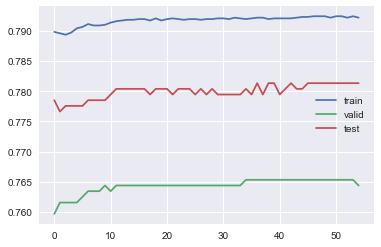


MPQADataset
Train precision 0.7923503064592173
Valid precision 0.7652214891611686
Test precision 0.7813383600377002
[1.00194082 0.99992808 1.00002063 ... 1.00000872 1.00002111 1.00003374]
MPQADataset tfor 0.1 400 MPQADataset_tfor_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

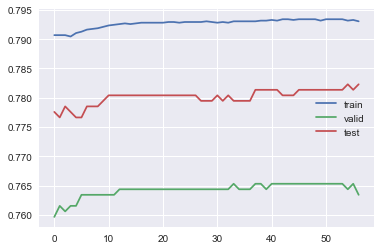

MPQADataset
Train precision 0.7932814710042433
Valid precision 0.7650329877474081
Test precision 0.7815268614514608
[1.00190485 0.99992012 1.00006539 ... 0.9999984  1.00002124 1.00003312]
MPQADataset tfor 0.01 200 MPQADataset_tfor_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-104:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



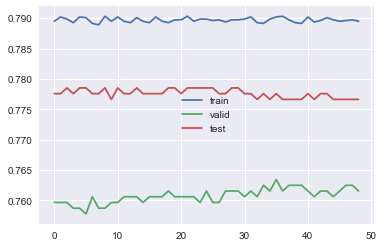


MPQADataset
Train precision 0.7896393210749647
Valid precision 0.7616399622997172
Test precision 0.7769085768143261
[1.00021216 0.9999792  1.00002702 ... 0.99999922 1.00000432 1.00000522]
MPQADataset tfor 0.01 300 MPQADataset_tfor_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

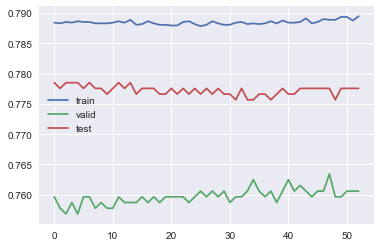

MPQADataset
Train precision 0.788979255068364
Valid precision 0.7606032045240341
Test precision 0.7773798303487276
[1.00023531 0.99997958 1.00003524 ... 0.99999632 1.00000464 1.00000464]
MPQADataset tfor 0.01 400 MPQADataset_tfor_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-105:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



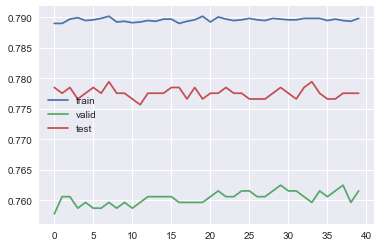


MPQADataset
Train precision 0.7896628948609147
Valid precision 0.7610744580584354
Test precision 0.7775683317624882
[1.00013152 1.00000176 1.00000271 ... 1.0000029  1.00000363 1.00000413]
MPQADataset tfor 0.001 200 MPQADataset_tfor_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

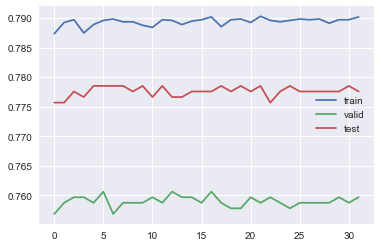

MPQADataset
Train precision 0.7896746817538898
Valid precision 0.7589066918001885
Test precision 0.7775683317624882
[1.00001012 0.99999938 1.00000147 ... 0.99999951 1.00000033 1.00000038]
MPQADataset tfor 0.001 300 MPQADataset_tfor_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-106:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



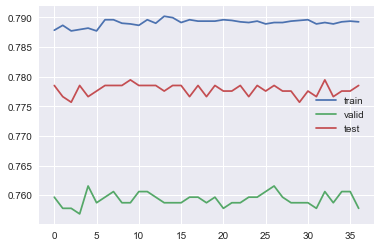


MPQADataset
Train precision 0.7892385667138142
Valid precision 0.7591894439208294
Test precision 0.7774740810556079
[1.00001626 0.99999692 1.00000158 ... 0.99999987 1.00000037 1.00000048]
MPQADataset tfor 0.001 400 MPQADataset_tfor_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

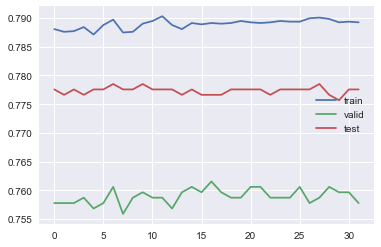

MPQADataset
Train precision 0.7895214521452144
Valid precision 0.7590951932139491
Test precision 0.7772855796418472
[1.00001198 0.99999871 0.99999637 ... 1.00000018 1.00000033 1.00000034]
MPQADataset tfrf 0.1 200 MPQADataset_tfrf_0.1_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-107:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



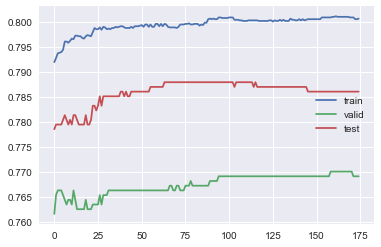


MPQADataset
Train precision 0.8008722300801508
Valid precision 0.769651272384543
Test precision 0.7860508953817152
[0.9980373  0.99971759 1.00014289 ... 1.00000832 1.00170503 1.00062908]
MPQADataset tfrf 0.1 300 MPQADataset_tfrf_0.1_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

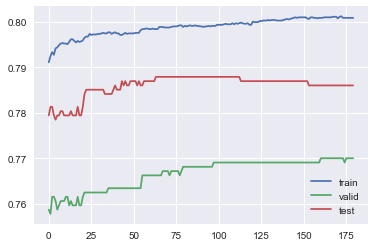

MPQADataset
Train precision 0.800966525223951
Valid precision 0.7699340245051838
Test precision 0.7860508953817152
[0.99835604 0.99977423 0.99997495 ... 0.9999798  1.00171534 1.00055901]
MPQADataset tfrf 0.1 400 MPQADataset_tfrf_0.1_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-108:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



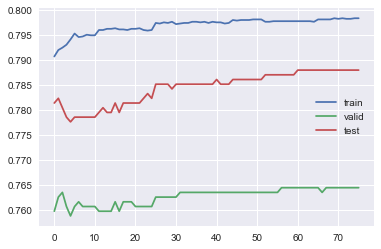


MPQADataset
Train precision 0.7982201791607733
Valid precision 0.7642789820923657
Test precision 0.7879359095193214
[0.99938966 0.99999206 1.00042729 ... 0.99999731 1.00130912 1.00011342]
MPQADataset tfrf 0.01 200 MPQADataset_tfrf_0.01_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

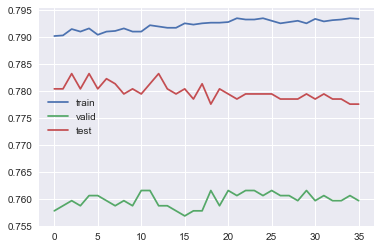

MPQADataset
Train precision 0.793045733144743
Valid precision 0.7602262016965127
Test precision 0.7785108388312911
[0.99998985 1.00003096 0.99999412 ... 0.99999732 1.00019357 1.00001246]
MPQADataset tfrf 0.01 300 MPQADataset_tfrf_0.01_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-109:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



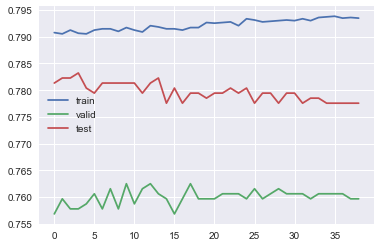


MPQADataset
Train precision 0.7934347006129184
Valid precision 0.7603204524033931
Test precision 0.7781338360037701
[0.99997895 0.9999778  1.00000334 ... 1.00000097 1.00020607 1.00001028]
MPQADataset tfrf 0.01 400 MPQADataset_tfrf_0.01_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

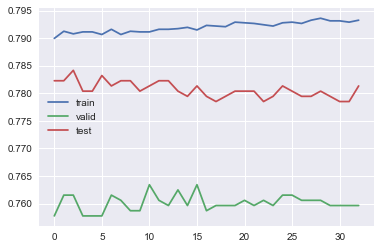

MPQADataset
Train precision 0.792986798679868
Valid precision 0.760320452403393
Test precision 0.7798303487276155
[0.99998518 1.00000602 0.99998898 ... 1.00000487 1.00018036 1.0000138 ]
MPQADataset tfrf 0.001 200 MPQADataset_tfrf_0.001_200


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-110:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



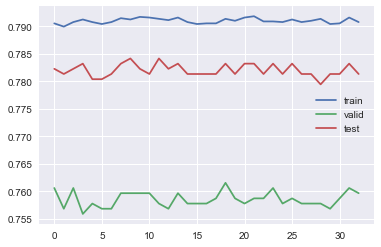


MPQADataset
Train precision 0.7909476661951909
Valid precision 0.7586239396795476
Test precision 0.7817153628652215
[0.99999874 1.00000069 1.00000096 ... 1.00000056 1.0000195  1.0000043 ]
MPQADataset tfrf 0.001 300 MPQADataset_tfrf_0.001_300


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

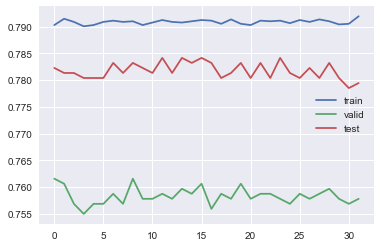

MPQADataset
Train precision 0.791030174446016
Valid precision 0.7580584354382658
Test precision 0.7810556079170594
[0.99999927 1.00000013 0.99998826 ... 0.99999994 1.00001857 1.0000045 ]
MPQADataset tfrf 0.001 400 MPQADataset_tfrf_0.001_400


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Exception in thread Thread-111:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/vlejd/.virtualenvs/diplomka/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



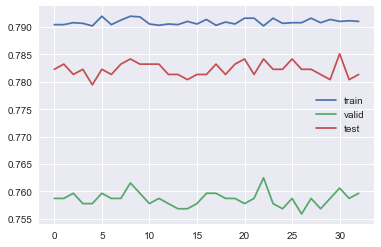


MPQADataset
Train precision 0.7910773220179161
Valid precision 0.7582469368520264
Test precision 0.7821866163996231
[0.99999888 1.00000087 1.00000427 ... 1.00000084 1.0000195  1.00000402]


In [6]:
start = False
start_on = 'CRDataset_tfig_0.001_400'

for dataset in datasets.ALL_DATASETS:
    for scheme in SimpleModel.SCHEMES:
        for alpha in [0.1, 0.01, 0.001]:
            for dims in [200, 300, 400]:
                tag = '{}_{}_{}_{}'.format(dataset.name(), scheme, alpha, dims)
                if not start:
                    start = (tag == start_on)
                    continue
                print(dataset.name(), scheme, alpha, dims, tag)
                model = SimpleModel(classify.SkClassifier(), use_svd=True, weights=scheme)
                test_simple_model_with_gradient(
                    model, dataset, alpha=alpha, dims=dims, tag=scheme, gradient_iters=None, results=results, dump=dump, with_models=False)
                print(model.w)
                results_file = 'dumps/batch_results_{}.pickle'.format(tag)
                dumps_file = 'dumps/batch_dump_{}.pickle'.format(tag)
                if False:
                    pickle.dump(results, open(results_file, 'bw'))
                    pickle.dump(dump, open(dumps_file, 'bw'))

                

In [ ]:
pd.DataFrame(results)